# Box jenkins 방법론으로 ARIMA 모형 적용 실습
## LAB1

box jenkins 방법에 의거하여 가장 적절한 ARIMA 모형을 찾는 실습의 과정을 기록합니다.<br/>

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0449 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


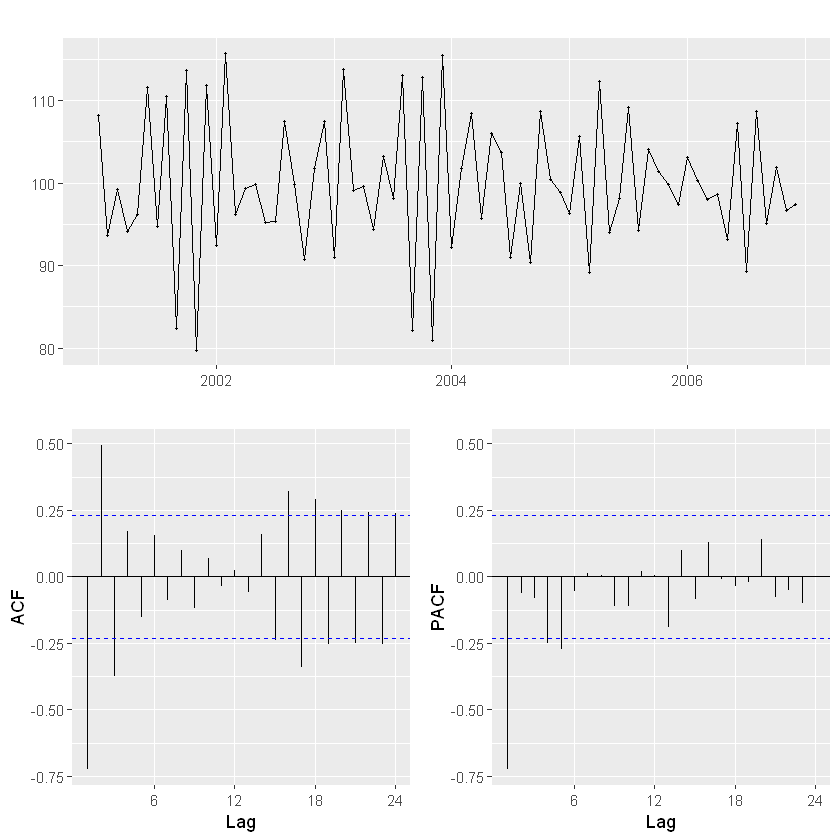

In [1]:
library(forecast)
library(ggplot2)
library(urca)

# load data
rawdata <- read.csv("data_ARIMA_DIY.csv")

# convert rawdata to time series object_monthly data
data1 <- ts(rawdata$data_1, start=c(2001,1), frequency=12)

#identification
ggtsdisplay(data1)

summary(ur.kpss(data1))

## 예비 분석

원계열을 그려보았을 때 평균이 약 95, 분산이 일정범위 내에 있어보입니다.<br/> 공분산은 육안으로 판단하기 어렵네요.<br/>
kpss 검정통계량을 활용하여 정상성을 만족하는 지 확인합니다.<br/>
유의수준 1%의 임계값보다 kpss 검정통계량이 더 작으므로 귀무가설 채택, 정상시계열입니다.<br/>


## 모형식별
ACF와 PACF 패턴을 보면 correlgoram에서 ARIMA(1,0,0), 파이값은 -1과 0사이로 보여집니다.<br/>
ACF가 양측에서 지수적으로 감소하고, PACF는 미세하게 튄값들이 있긴하지만 한 개만 크게 튀었으니 1차 AR모형같아보여서요.<br/>

하지만 육안으로 판별하는 것이 항상 일치하지는 않을 수 있으므로 ARIMA(2,0,0)과 ARIMA(0,0,1), ARIMA(0,0,2), ARIMA(1,0,1)까지 다섯개의 모형을 비교분석해보겠습니다.<br/>

In [2]:
# estimation
arima_1_100 <- Arima(data1, order=c(1,0,0))
arima_1_100

arima_1_200 <- Arima(data1, order=c(2,0,0))
arima_1_200

arima_1_001 <- Arima(data1, order=c(0,0,1))
arima_1_001

arima_1_002 <- Arima(data1, order=c(0,0,2))
arima_1_002

arima_1_101 <- Arima(data1, order=c(1,0,1))
arima_1_101

Series: data1 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.7248  99.8025
s.e.   0.0796   0.3885

sigma^2 estimated as 32.87:  log likelihood=-227.26
AIC=460.51   AICc=460.87   BIC=467.34

Series: data1 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2     mean
      -0.7731  -0.0657  99.8042
s.e.   0.1174   0.1175   0.3640

sigma^2 estimated as 33.2:  log likelihood=-227.1
AIC=462.2   AICc=462.8   BIC=471.31

Series: data1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -1.0000  99.9748
s.e.   0.0528   0.0315

sigma^2 estimated as 33.06:  log likelihood=-229.24
AIC=464.47   AICc=464.82   BIC=471.3

Series: data1 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1     ma2     mean
      -0.9361  0.0950  99.9009
s.e.   0.1184  0.1097   0.1385

sigma^2 estimated as 35:  log likelihood=-229.29
AIC=466.57   AICc=467.17   BIC=475.68

Series: data1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.6608  -0.1351  99.8060
s.e.   0.1433   0.2221   0.3486

sigma^2 estimated as 33.14:  log likelihood=-227.04
AIC=462.08   AICc=462.68   BIC=471.19

## 모수 추정

mean 값은 상수값과 연관이 있습니다. 따라서 기본적으로 데이터가 0 주위를 왔다갔다하면 mean 값은 크게 필요하지 않겠지만, 이 데이터의 경우에는 평균이 95 근처이므로 포함시켜주었습니다.<br/>


*arima_1_100의 모형식*<br/>
𝑌_𝑡=99.8025×(1+0.7248)-0.7248×𝑌_(𝑡-1)+𝜀_𝑡

*arima_1_200의 모형식*<br/>
𝑌_𝑡=99.8042×(1+0.7731+0.0657)-0.7731×𝑌_(𝑡-1)-0.0657×𝑌_(𝑡-2)+𝜀_𝑡

*arima_1_001의 모형식*<br/>
𝑌_𝑡=99.9748-1.0×𝜀_(𝑡−1)+𝜀_𝑡

*arima_1_002의 모형식*<br/>
𝑌_𝑡=99.9009-0.9361×𝜀_(𝑡−1)+0.0950×𝜀_(𝑡−2)+𝜀_𝑡

*arima_1_101의 모형식*<br/>
𝑌_𝑡=99.8060×(1+0.6608)-0.6608×𝑌_(𝑡-1)-0.1351×𝜀_(𝑡-1)+𝜀_𝑡


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 13.366, df = 12, p-value = 0.343

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_1_100$residuals
X-squared = 12.107, df = 10, p-value = 0.2779


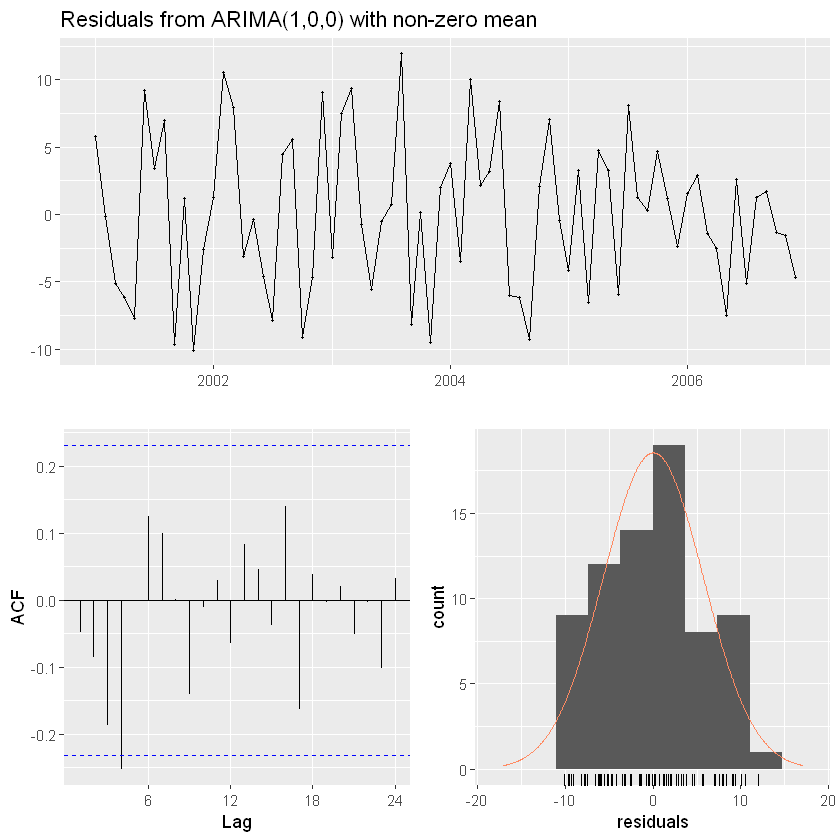

In [3]:
# diagnostic checking
# 적합성 진단 way1
checkresiduals(arima_1_100)

# 적합성 진단 way2
Box.test(arima_1_100$residuals, lag=10, type="Ljung-Box")

## 적합성 진단
p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 정규분포 모양을 보이고 있습니다.<br/>
ACF에서 하나가 신뢰구간을 뚫고 살짝 튀긴했지만 백색잡음 형태에 가까우므로 arima_1_100모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 14.314, df = 11, p-value = 0.2161

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_1_200$residuals
X-squared = 13.299, df = 10, p-value = 0.2074


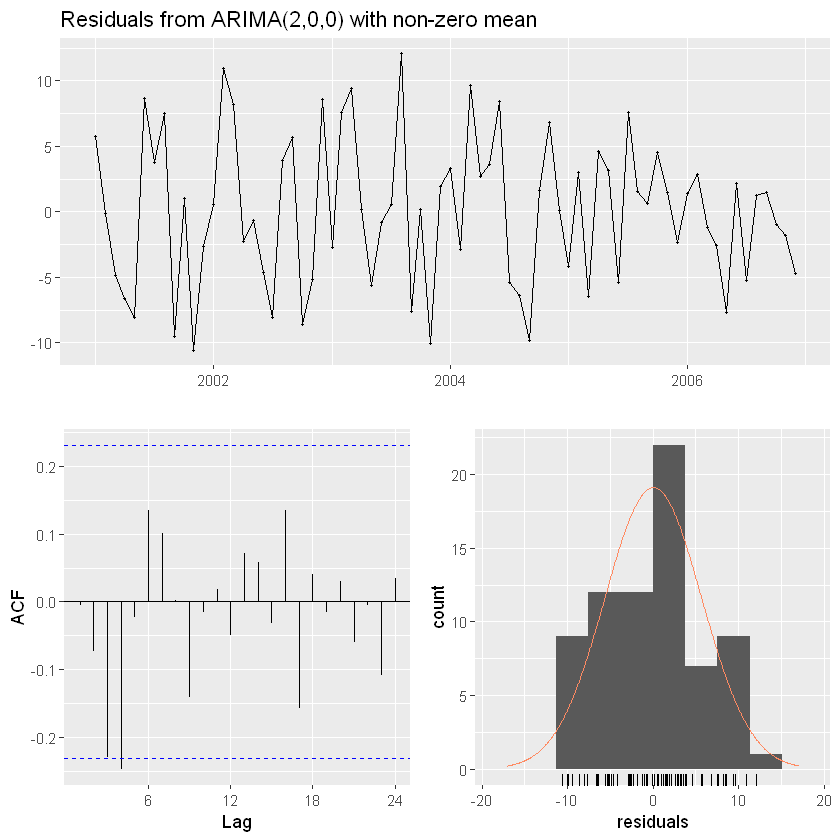

In [4]:
# 적합성 진단 way1
checkresiduals(arima_1_200)

# 적합성 진단 way2
Box.test(arima_1_200$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 거의 정규분포 모양을 보이고 있습니다.<br/>
이번에도 ACF에서 하나가 신뢰구간을 뚫고 살짝 튀긴했지만 백색잡음 형태에 가까우므로 arima_1_200모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 19.305, df = 12, p-value = 0.08144

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_1_001$residuals
X-squared = 17.589, df = 10, p-value = 0.0623


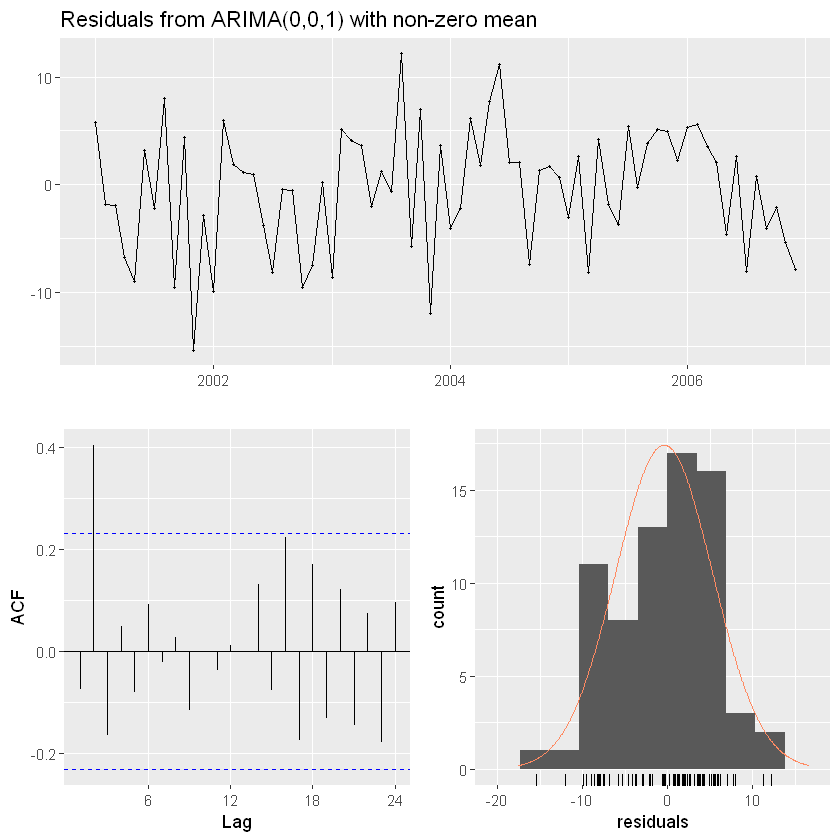

In [5]:
# 적합성 진단 way1
checkresiduals(arima_1_001)

# 적합성 진단 way2
Box.test(arima_1_001$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 거의 정규분포 모양을 보이고 있습니다.<br/>
ACF에서 하나가 신뢰구간을 뚫고 비교적 크게 튀었으므로 arima_1_001모형은 이전 모형들과 비교해 상대적으로 적합이 잘 되었다고 말하기는 어렵습니다.<br/>

귀무가설을 채택하긴 했지만 백색잡음형태와 거리가 있으므로 이 모형은 후보에서 버리겠습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 17.607, df = 11, p-value = 0.09117

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_1_002$residuals
X-squared = 16.024, df = 10, p-value = 0.09894


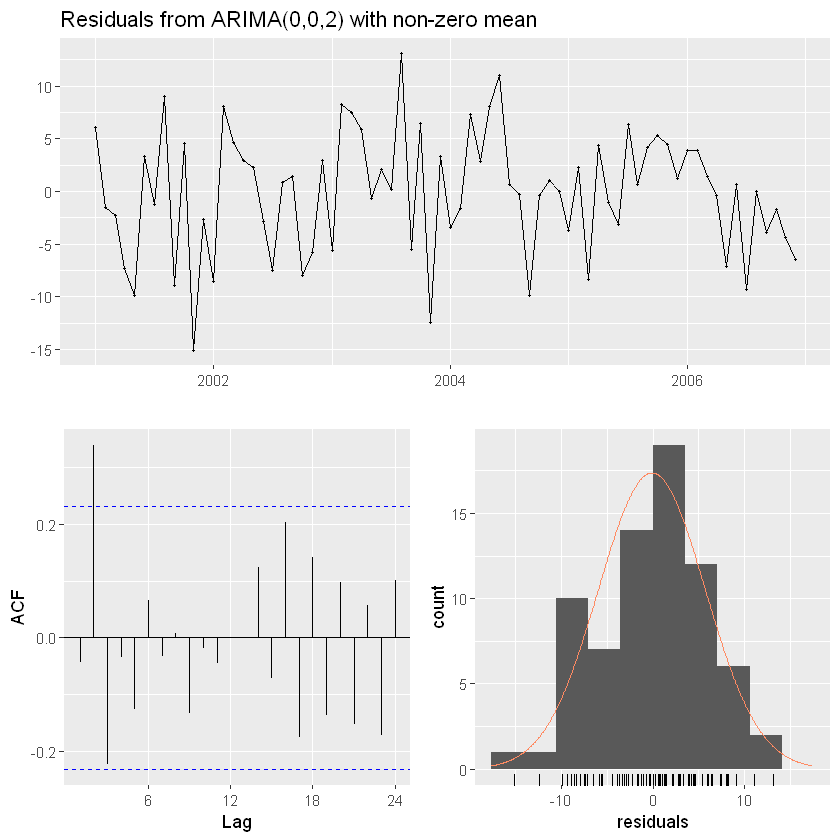

In [6]:
# 적합성 진단 way1
checkresiduals(arima_1_002)

# 적합성 진단 way2
Box.test(arima_1_002$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 거의 정규분포 모양을 보이고 있습니다.<br/>
ACF에서 하나가 신뢰구간을 뚫고 비교적 크게 튀었습니다.<br/>
arima_1_002모형은 arima_1_001보다는 근소한 차이로 잘 적합된 편이지만, 이전 AR 모형들과 비교해 상대적으로 적합이 잘 되었다고 말하기는 어렵습니다.<br/>

귀무가설을 채택하긴 했지만 백색잡음형태와 거리가 있으므로 이 모형은 후보에서 버리겠습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 14.716, df = 11, p-value = 0.1959

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_1_101$residuals
X-squared = 13.74, df = 10, p-value = 0.1852


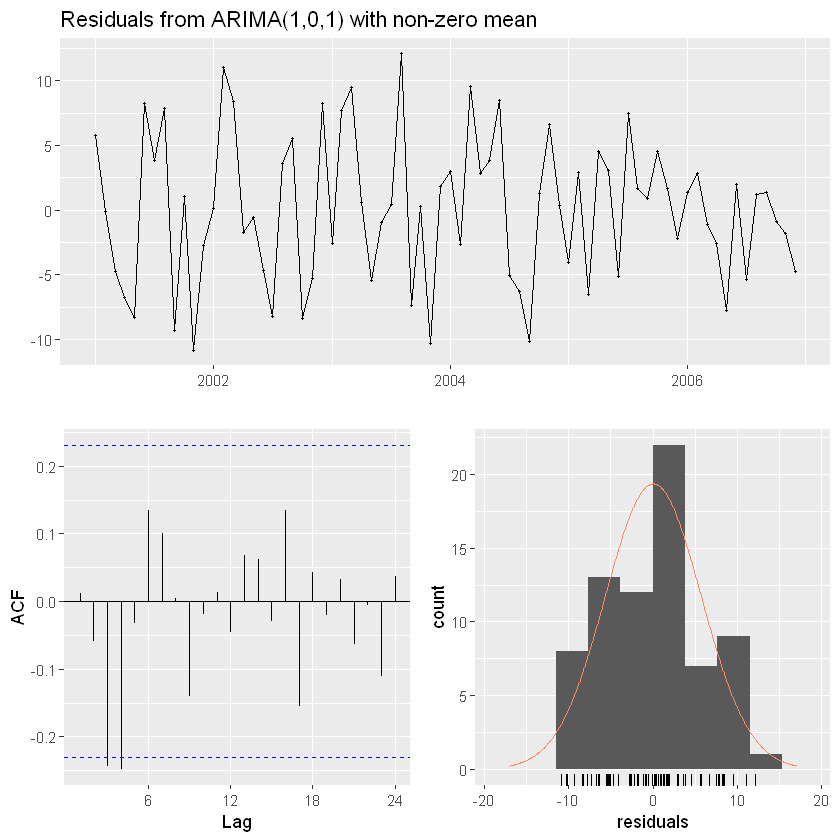

In [7]:
# 적합성 진단 way1
checkresiduals(arima_1_101)

# 적합성 진단 way2
Box.test(arima_1_101$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 거의 정규분포 모양을 보이고 있습니다.<br/>
ACF에서 두개가 신뢰구간을 뚫고 살짝 튀었습니다.<br/>
arima_1_101모형은 잔차 평가가 보통..인 편이라고 판단하겠습니다.<br/>

arima_1_100 모형과 arima_1_200, arima_1_101 모형까지 세 모형을 가지고 예측을 시행해본 뒤 가장 적합한 모형을 선별하도록 하겠습니다.<br/>


Forecast method: ARIMA(1,0,0) with non-zero mean

Model Information:
Series: data1 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.7248  99.8025
s.e.   0.0796   0.3885

sigma^2 estimated as 32.87:  log likelihood=-227.26
AIC=460.51   AICc=460.87   BIC=467.34

Error measures:
                     ME     RMSE      MAE        MPE    MAPE     MASE
Training set 0.04825857 5.653194 4.693908 -0.2869442 4.78306 0.521642
                    ACF1
Training set -0.04736431

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007      101.54389 94.19626 108.8915 90.30666 112.7811
Feb 2007       98.54033 89.46560 107.6151 84.66173 112.4189
Mar 2007      100.71736 90.85575 110.5790 85.63533 115.7994
Apr 2007       99.13941 88.88857 109.3902 83.46211 114.8167
May 2007      100.28314 89.83362 110.7326 84.30199 116.2643


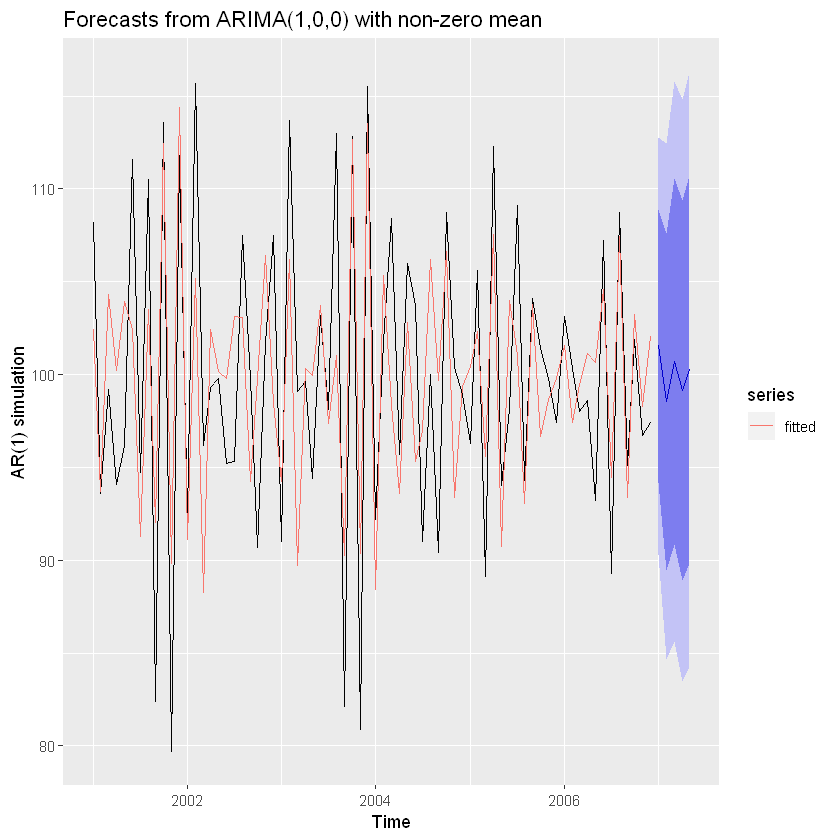

In [8]:
# forecasting
# 테스트
arima_1_100_F <- forecast(arima_1_100, h=5)
summary(arima_1_100_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_1_100_F) + autolayer(fitted(arima_1_100_F),series="fitted") + xlab("Time") + ylab("AR(1) simulation")


Forecast method: ARIMA(2,0,0) with non-zero mean

Model Information:
Series: data1 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2     mean
      -0.7731  -0.0657  99.8042
s.e.   0.1174   0.1175   0.3640

sigma^2 estimated as 33.2:  log likelihood=-227.1
AIC=462.2   AICc=462.8   BIC=471.31

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.05007599 5.640542 4.637732 -0.2842208 4.728966 0.5153989
                     ACF1
Training set -0.005114682

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007      101.86684 94.48272 109.2510 90.57380 113.1599
Feb 2007       98.36739 89.03376 107.7010 84.09283 112.6420
Mar 2007      100.77944 90.65272 110.9062 85.29196 116.2669
Apr 2007       99.14453 88.67372 109.6153 83.13081 115.1582
May 2007      100.25005 89.62564 110.8745 84.00141 116.4987


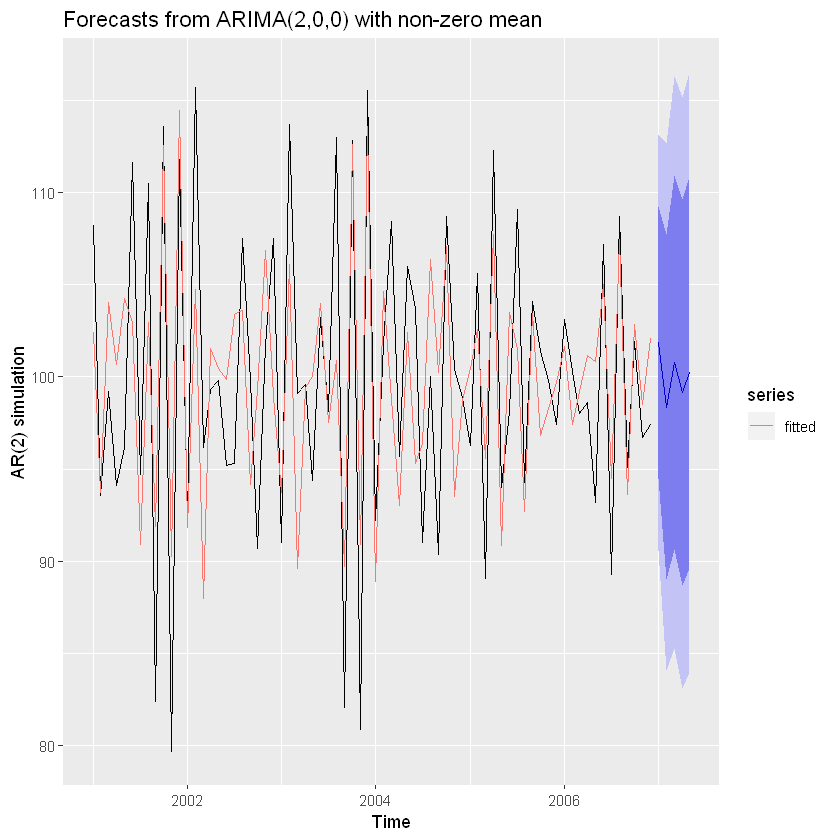

In [9]:
# 테스트
arima_1_200_F <- forecast(arima_1_200, h=5)
summary(arima_1_200_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_1_200_F) + autolayer(fitted(arima_1_200_F),series="fitted") + xlab("Time") + ylab("AR(2) simulation")


Forecast method: ARIMA(1,0,1) with non-zero mean

Model Information:
Series: data1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.6608  -0.1351  99.8060
s.e.   0.1433   0.2221   0.3486

sigma^2 estimated as 33.14:  log likelihood=-227.04
AIC=462.08   AICc=462.68   BIC=471.19

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.0500186 5.635482 4.614241 -0.2840783 4.706057 0.5127884
                   ACF1
Training set 0.01135671

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007      102.03194 94.65444 109.4094 90.74903 113.3148
Feb 2007       98.33506 88.90589 107.7642 83.91439 112.7557
Mar 2007      100.77801 90.58160 110.9744 85.18395 116.3721
Apr 2007       99.16368 88.64979 109.6776 83.08407 115.2433
May 2007      100.23045 89.58089 110.8800 83.94335 116.5175


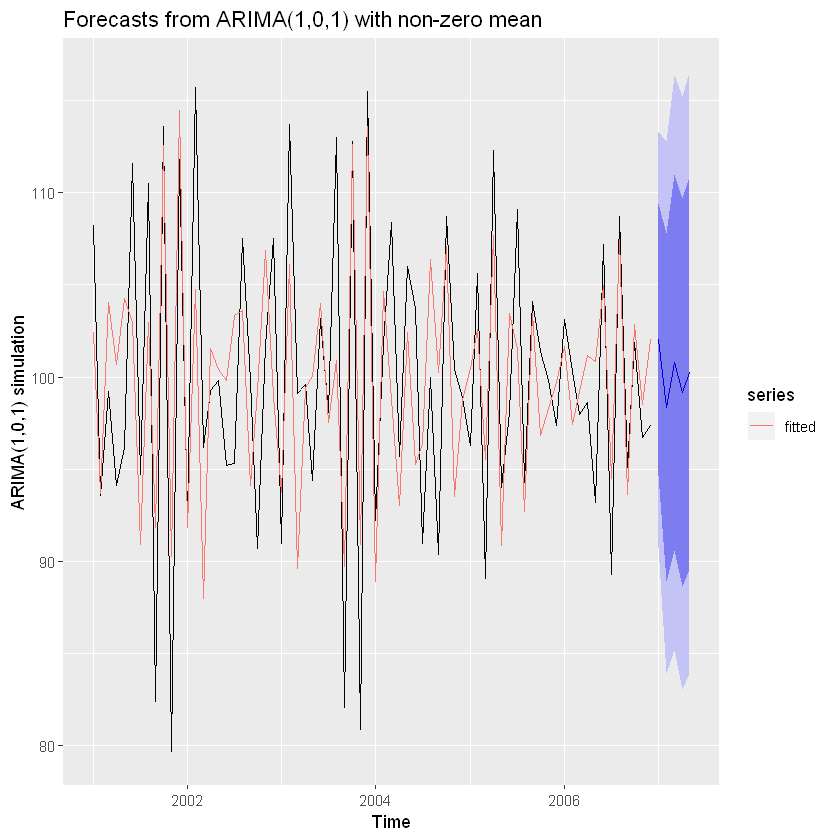

In [10]:
# 테스트
arima_1_101_F <- forecast(arima_1_101, h=5)
summary(arima_1_101_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_1_101_F) + autolayer(fitted(arima_1_200_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,0,1) simulation")

In [11]:
library(data.table)
# 예측값들 표로 정리해서 보여주기
table <- data.table(arima_1_100_F$mean,arima_1_200_F$mean,arima_1_101_F$mean)
colnames(table)<- c("ARIMA(1,0,0)","ARIMA(2,0,0)","ARIMA(1,0,1)")
rownames(table)<- c("h1","h2","h3","h4","h5")
table

,"ARIMA(1,0,0)","ARIMA(2,0,0)","ARIMA(1,0,1)"
,<ts>,<ts>,<ts>
h1,101.54389,101.86684,102.03194
h2,98.54033,98.36739,98.33506
h3,100.71736,100.77944,100.77801
h4,99.13941,99.14453,99.16368
h5,100.28314,100.25005,100.23045


## 예측
**RMSE 비교**<br/>
arima_1_100의 RMSE = 5.653194<br/>
arima_1_200의 RMSE = 5.640542<br/>
arima_1_101의 RMSE = 5.635482<br/>

**AICc 비교**<br/>
arima_1_100의 AICc = 460.87<br/>
arima_1_200의 AICc = 462.8<br/>
arima_1_101의 AICc = 462.68<br/>

RMSE 값을 비교했을 때 가장 적은 모형은 ARIMA(1,0,1)로 ARMA 모형입니다.<br/>
하지만 AICc값을 비교해보면 파라메터 수가 가장 적어 정보손실량이 적은 ARIMA(1,0,0)로 AR(1) 모형입니다.<br/>

test 데이터 없이 train 데이터에만 의존하는 상황이니 RMSE값이 큰 의미를 갖지 않을 것이며, 정보손실량은 약 2 정도 차이나지만 RMSE는 0.02정도 높은 것이니까 AR 모형을 가장 좋은 모형이라고 평가하겠습니다.<br/>

여기까지가 첫 번째 실습입니다.
***

## LAB2
두 번째 실습내용입니다.<br/>


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.191 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


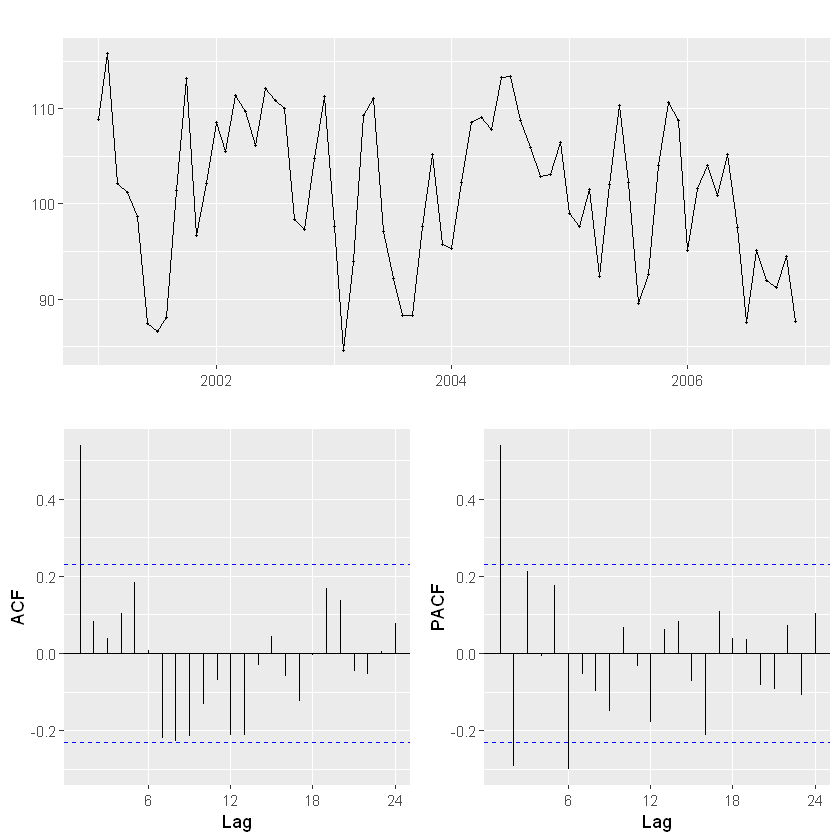

In [12]:
# convert rawdata to time series object_monthly data
data2 <- ts(rawdata$data_2, start=c(2001,1), frequency=12)

#identification
ggtsdisplay(data2)

summary(ur.kpss(data2))

## 예비 분석

원계열을 그려보았을 때 평균이 약 100, 분산이 일정범위 내에 있어보이긴 합니다만 추세를 가졌나? 의문입니다.<br/>
마찬가지로 kpss 검정통계량을 활용하여 정상성을 만족하는 지 확인합니다.<br/>
유의수준 1%의 임계값보다 kpss 검정통계량이 더 작으므로 귀무가설 채택, 정상시계열입니다.<br/>


## 모형식별
ACF와 PACF 패턴을 보면 correlgoram에서 ARIMA(0,0,1), 세타값은 -1과 0사이로 보여집니다.<br/>
ACF가 한 값이 튀어보이고 PACF는 양측에서 지수적으로 감소하는 형태가 아닐까 싶어서요.<br/>

하지만 육안으로 판별하는 것이 항상 일치하지는 않을 수 있으므로 ARIMA(1,0,0), ARIMA(1,0,1)까지 총 세 개의 모형을 비교분석해보겠습니다.<br/>

In [13]:
# estimation
arima_2_001 <- Arima(data2, order=c(0,0,1))
arima_2_001

arima_2_100 <- Arima(data2, order=c(1,0,0))
arima_2_100

arima_2_101 <- Arima(data2, order=c(1,0,1))
arima_2_101

Series: data2 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1      mean
      0.8060  101.1013
s.e.  0.0685    1.2672

sigma^2 estimated as 36.91:  log likelihood=-231.58
AIC=469.16   AICc=469.51   BIC=475.99

Series: data2 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.5621  101.1344
s.e.  0.0993    1.7543

sigma^2 estimated as 45.24:  log likelihood=-238.57
AIC=483.14   AICc=483.49   BIC=489.97

Series: data2 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1      mean
      0.1278  0.7592  101.0675
s.e.  0.1462  0.0959    1.4060

sigma^2 estimated as 37.06:  log likelihood=-231.21
AIC=470.42   AICc=471.01   BIC=479.52

## 모수 추정
*arima_2_001의 모형식*<br/>
𝑌_𝑡=101.1013+0.8060×𝜀_(𝑡−1)+𝜀_𝑡

*arima_2_100의 모형식*<br/>
𝑌_𝑡=101.1344×(1-0.5621)+0.5621×𝑌_(𝑡-1)+𝜀_𝑡

*arima_2_101의 모형식*<br/>
𝑌_𝑡=101.0675×(1-0.1278)+0.1278×𝑌_(𝑡-1)+0.7592×𝜀_(𝑡-1)+𝜀_𝑡


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 15.338, df = 12, p-value = 0.2235

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_2_001$residuals
X-squared = 10.635, df = 10, p-value = 0.3866


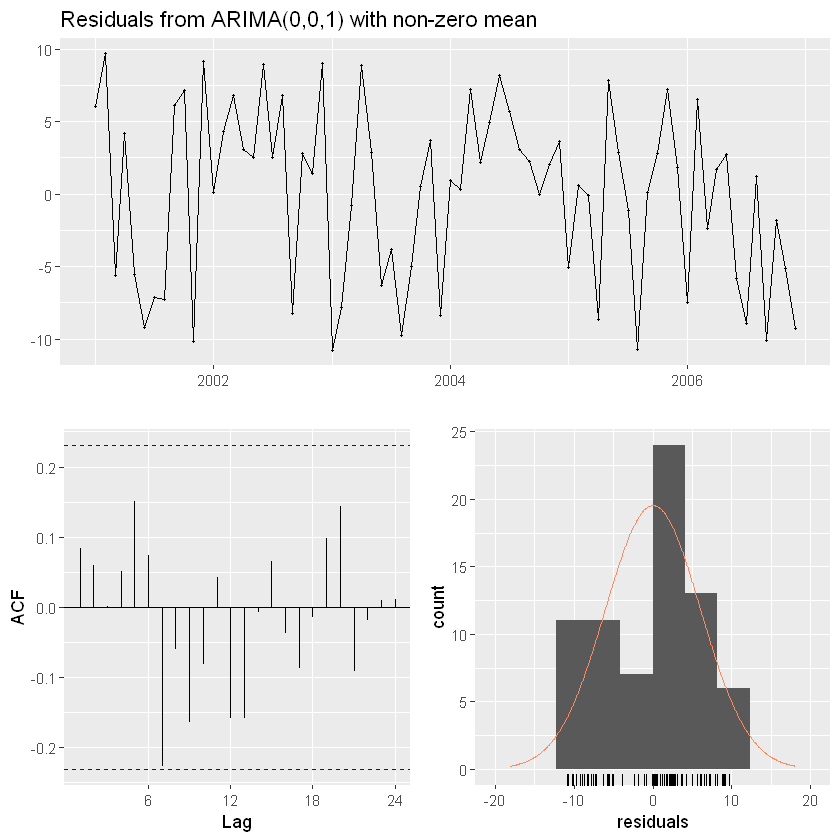

In [14]:
# diagnostic checking
# 적합성 진단 way1
checkresiduals(arima_2_001)

# 적합성 진단 way2
Box.test(arima_2_001$residuals, lag=10, type="Ljung-Box")

## 적합성 진단
p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 거의 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태에 가까우므로 arima_2_001모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 29.394, df = 12, p-value = 0.003442

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_2_100$residuals
X-squared = 21.481, df = 10, p-value = 0.01798


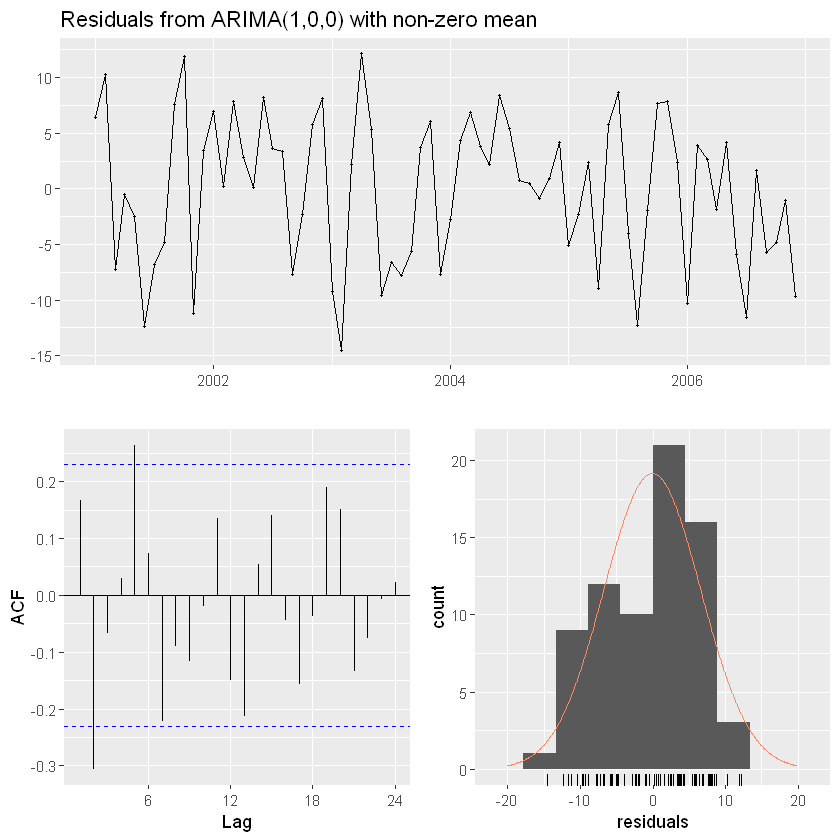

In [15]:
# 적합성 진단 way1
checkresiduals(arima_2_100)

# 적합성 진단 way2
Box.test(arima_2_100$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 작으므로 귀무가설을 기각(reject), 대립가설을 채택(accept)합니다.<br/>
유의수준이 더 크다는 것은 귀무가설을 기각할 때 5%의 실수할 확률이 있는 것으로 가정하여 잔차들끼리의 자기상관성이 존재한다고 판단합니다.<br/>
잔차 평가가 열등합니다.<br/>

이 모형은 후보에서 버리겠습니다.<br/>

비교할 모형이 없어졌으므로 Meanf()와 Naive()로 벤치마킹하려하니 두 모형 모두 만만치 않게 잔차 평가가 열등해서 과제에서 쓰지말라고 명시되어있던 auto.arima라도 써볼까하다가 ARIMA(1,0,1) 모형을 급하게 추가해서 해봅니다 ㅎㅎ<br/>


	Ljung-Box test

data:  Residuals from Mean
Q* = 48.537, df = 13, p-value = 5.303e-06

Model df: 1.   Total lags used: 14




	Box-Ljung test

data:  m$residuals
X-squared = 39.863, df = 10, p-value = 1.791e-05


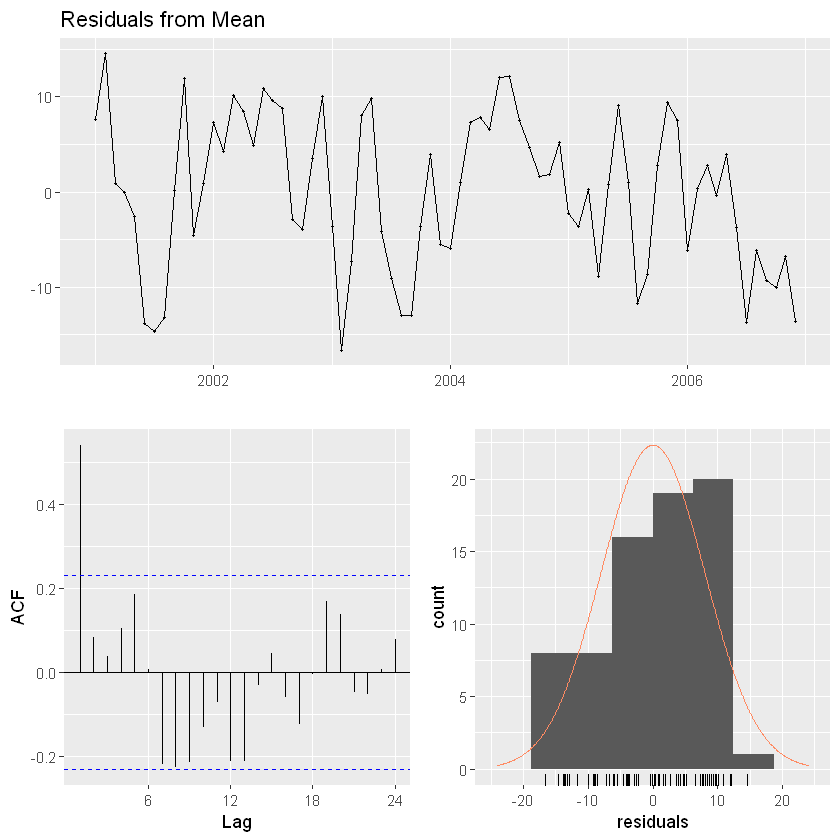

In [16]:
# 벤츠마크1 meanf 모형 적합시키기
m <- meanf(data2,h=5)

# 적합성 진단 way1
checkresiduals(m)

# 적합성 진단 way2
Box.test(m$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 작으므로 귀무가설을 기각(reject), 대립가설을 채택(accept)합니다.<br/>
유의수준이 더 크다는 것은 귀무가설을 기각할 때 5%의 실수할 확률이 있는 것으로 가정하여 잔차들끼리의 자기상관성이 존재한다고 판단합니다.<br/>
잔차 평가가 만만치 않게 열등합니다.ㅠㅠ<br/>

하지만 벤츠마크 모형이므로 후보에서 유지할지 말지 고민하다가 버립니다.<br/>


	Ljung-Box test

data:  Residuals from Random walk
Q* = 39.37, df = 14, p-value = 0.0003197

Model df: 0.   Total lags used: 14




	Box-Ljung test

data:  n$residuals
X-squared = 30.259, df = 10, p-value = 0.0007769


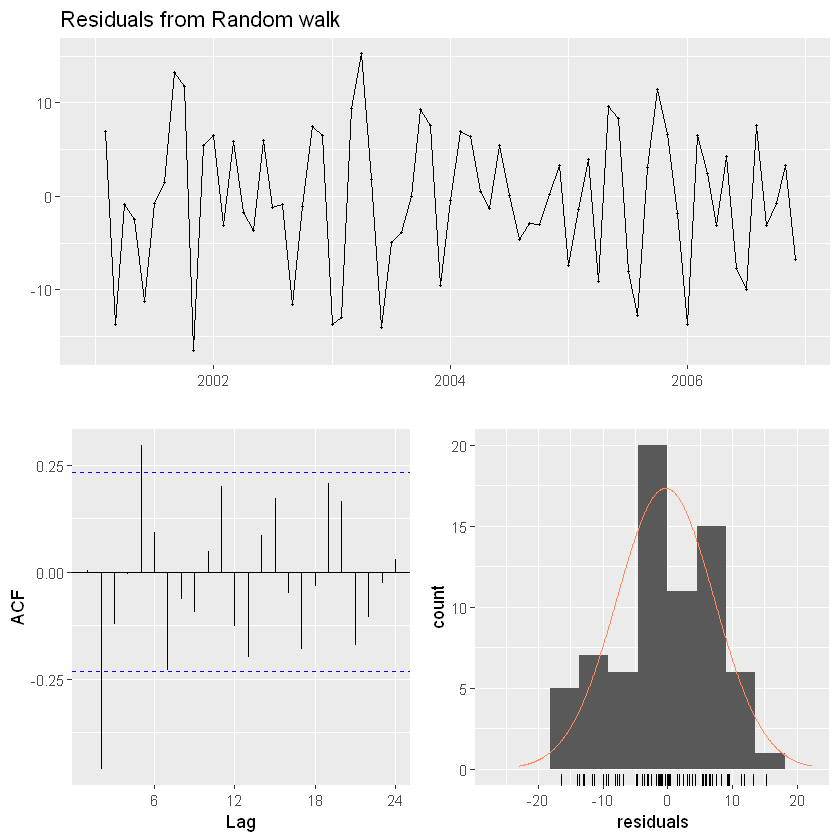

In [17]:
# 벤츠마크1 naive 모형 적합시키기
n <- rwf(data2,h=5)

# 적합성 진단 way1
checkresiduals(n)

# 적합성 진단 way2
Box.test(n$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 작으므로 귀무가설을 기각(reject), 대립가설을 채택(accept)합니다.<br/>
유의수준이 더 크다는 것은 귀무가설을 기각할 때 5%의 실수할 확률이 있는 것으로 가정하여 잔차들끼리의 자기상관성이 존재한다고 판단합니다.<br/>
naive도 잔차 평가가 만만치 않게 열등합니다.ㅠㅠ<br/>

하지만 벤츠마크 모형이므로 후보에서 유지할지 말지 고민하다가 버립니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 13.906, df = 11, p-value = 0.2382

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_2_101$residuals
X-squared = 9.2843, df = 10, p-value = 0.5054


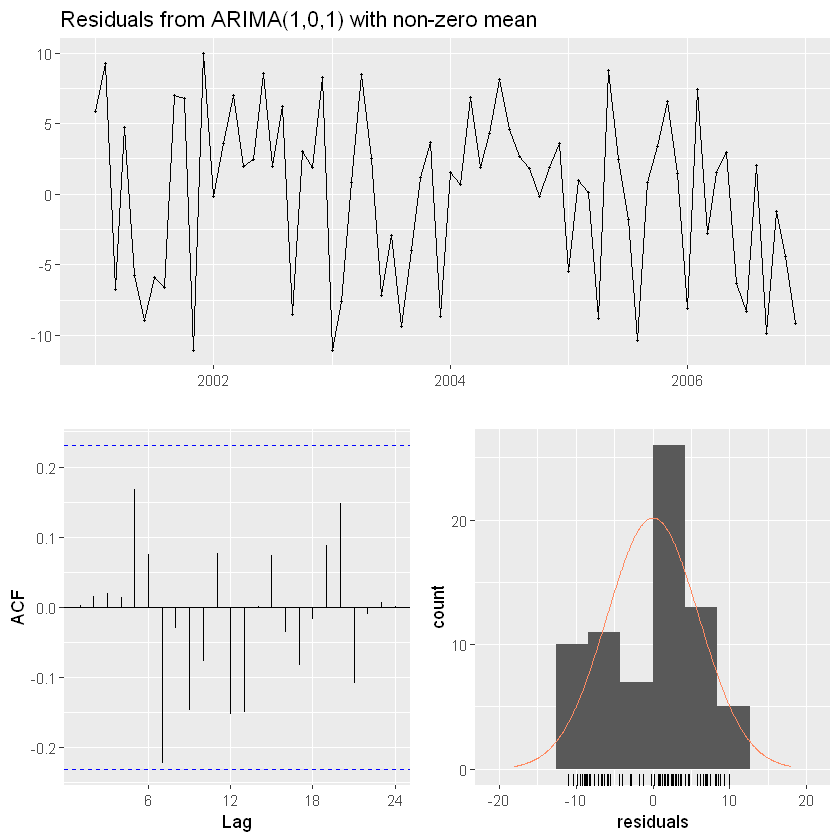

In [18]:
# 적합성 진단 way1
checkresiduals(arima_2_101)

# 적합성 진단 way2
Box.test(arima_2_101$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 거의 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태에 가까우므로 arima_2_101모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


Forecast method: ARIMA(0,0,1) with non-zero mean

Model Information:
Series: data2 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1      mean
      0.8060  101.1013
s.e.  0.0685    1.2672

sigma^2 estimated as 36.91:  log likelihood=-231.58
AIC=469.16   AICc=469.51   BIC=475.99

Error measures:
                     ME     RMSE      MAE        MPE   MAPE     MASE     ACF1
Training set 0.01080688 5.990457 5.072266 -0.3777207 5.0942 0.496875 0.083606

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       93.65243 85.86645 101.4384 81.74480 105.5601
Feb 2007      101.10129 91.10116 111.1014 85.80742 116.3952
Mar 2007      101.10129 91.10116 111.1014 85.80742 116.3952
Apr 2007      101.10129 91.10116 111.1014 85.80742 116.3952
May 2007      101.10129 91.10116 111.1014 85.80742 116.3952


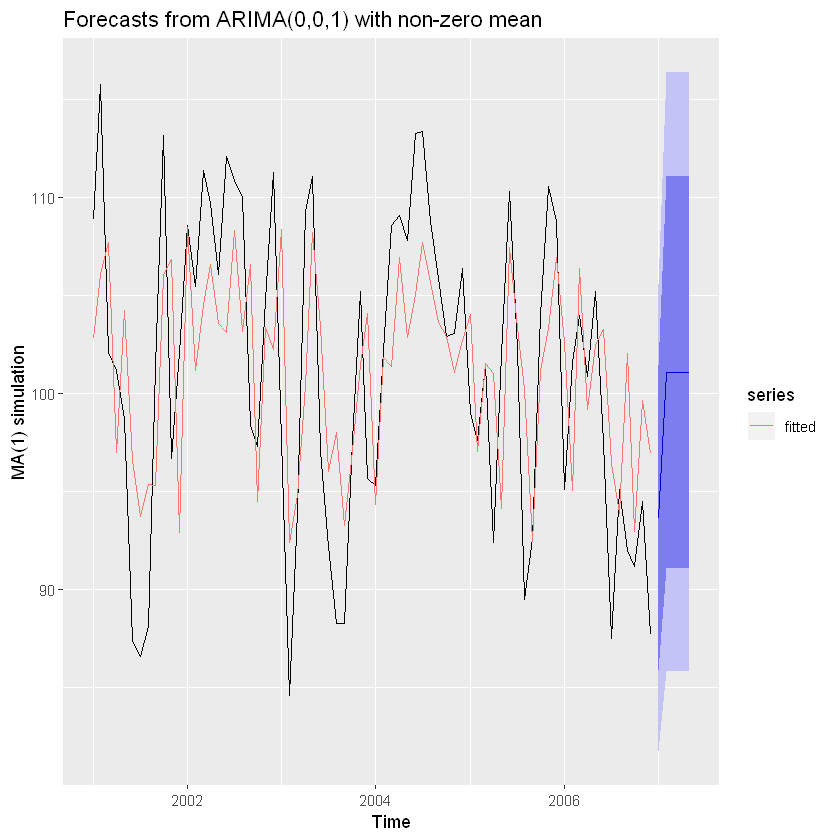

In [19]:
# forecasting
# 테스트
arima_2_001_F <- forecast(arima_2_001, h=5)
summary(arima_2_001_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_2_001_F) + autolayer(fitted(arima_2_001_F),series="fitted") + xlab("Time") + ylab("MA(1) simulation")


Forecast method: ARIMA(1,0,1) with non-zero mean

Model Information:
Series: data2 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1      mean
      0.1278  0.7592  101.0675
s.e.  0.1462  0.0959    1.4060

sigma^2 estimated as 37.06:  log likelihood=-231.21
AIC=470.42   AICc=471.01   BIC=479.52

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.006248341 5.959168 5.048514 -0.3559711 5.074006 0.4945483
                    ACF1
Training set 0.002118844

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       92.37552 84.57429 100.1768 80.44456 104.3065
Feb 2007       99.95699 89.52908 110.3849 84.00887 115.9051
Mar 2007      100.92564 90.46031 111.3910 84.92030 116.9310
Apr 2007      101.04940 90.58346 111.5153 85.04313 117.0557
May 2007      101.06521 90.59926 111.5312 85.05893 117.0715


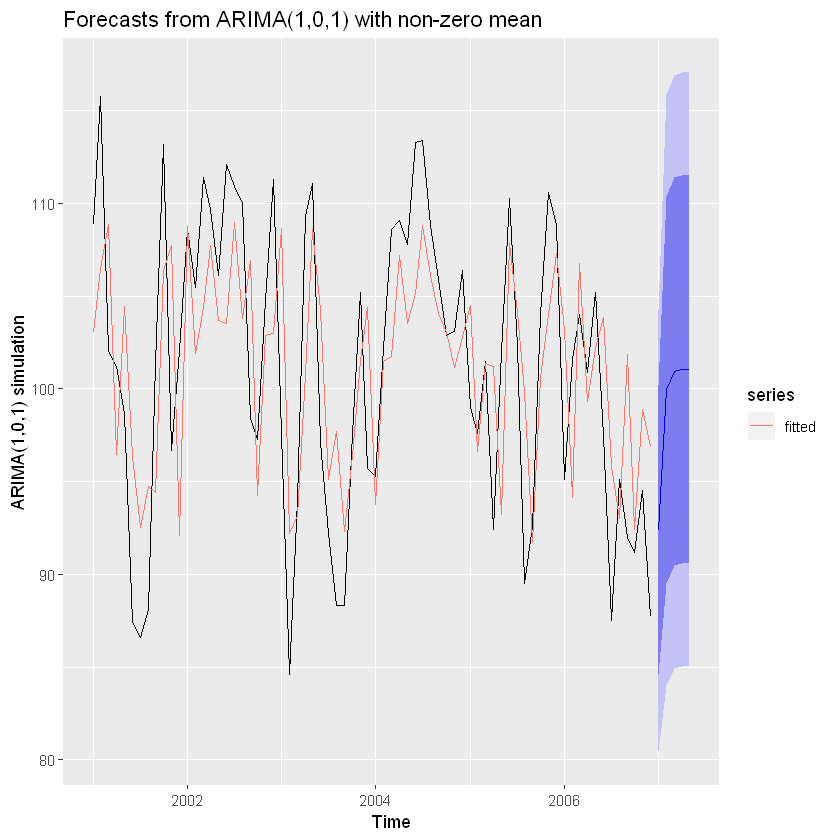

In [20]:
# 테스트
arima_2_101_F <- forecast(arima_2_101, h=5)
summary(arima_2_101_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_2_101_F) + autolayer(fitted(arima_2_101_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,0,1) simulation")

In [21]:
# 예측값들 표로 정리해서 보여주기
table <- data.table(arima_2_001_F$mean,arima_2_101_F$mean)
colnames(table)<- c("ARIMA(0,0,1)","ARIMA(1,0,1)")
rownames(table)<- c("h1","h2","h3","h4","h5")
table

,"ARIMA(0,0,1)","ARIMA(1,0,1)"
,<ts>,<ts>
h1,93.65243,92.37552
h2,101.10129,99.95699
h3,101.10129,100.92564
h4,101.10129,101.04940
h5,101.10129,101.06521


## 예측
**RMSE 비교**<br/>
arima_2_001의 RMSE = 5.990457<br/>
arima_2_101의 RMSE = 5.959168<br/>

**AICc 비교**<br/>
arima_2_001의 AICc = 469.51<br/>
arima_2_101의 AICc = 471.01<br/>

RMSE 값을 비교했을 때 더 작은 모형은 ARIMA(1,0,1)로 ARMA 모형입니다.<br/>
하지만 AICc값을 비교해보면 파라메터 수가 가장 적어 정보손실량이 적은 ARIMA(0,0,1)로 MA(1) 모형입니다.<br/>

육안으로 보이는 ACF와 PACF 형태도 그렇고, test 데이터 없이 train 데이터에만 의존하는 상황이니 RMSE값이 큰 의미를 갖지 않을 것이며, 정보손실량은 약 2 정도 차이나지만 RMSE는 0.04정도 높은 것이니까 MA 모형을 가장 좋은 모형이라고 평가하겠습니다.<br/>

여기까지가 두 번째 실습입니다.
***

## LAB3
세 번째 실습내용입니다.<br/>


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0482 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


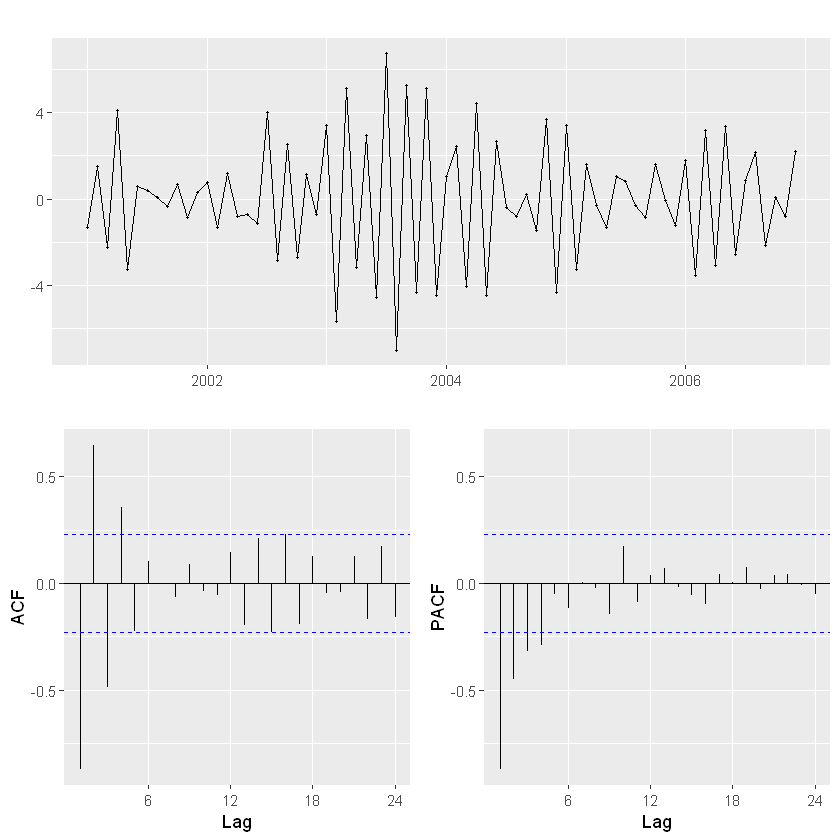

In [22]:
# convert rawdata to time series object_monthly data
data3 <- ts(rawdata$data_3, start=c(2001,1), frequency=12)

#identification
ggtsdisplay(data3)

summary(ur.kpss(data3))

## 예비 분석

원계열을 그려보았을 때 평균이 약 0, 분산이 일정범위 내에 있어보이고 공분산도 시차에만 의존적으로 보입니다.<br/>
하지만 kpss 검정통계량을 활용하여 정말 정상성을 만족하는 지 확인합니다.<br/>
유의수준 1%의 임계값보다 kpss 검정통계량이 더 작으므로 귀무가설 채택, 정상시계열입니다.<br/>


## 모형식별
ACF와 PACF 패턴을 보면 correlgoram에서 ARIMA(1,0,1), 파이값은 -1과 0사이, 세타값은 0과 1사이로 보여집니다.<br/>
ACF와 PACF 모두 양측에서 지수적으로 감소하는 형태가 아닐까 싶어서요.<br/>

하지만 육안으로 판별하는 것이 항상 일치하지는 않을 수 있으므로 ARIMA(3,0,0), ARIMA(4,0,0), ARIMA(2,0,1), ARIMA(1,0,2)까지 총 다섯 개의 모형을 비교분석해보겠습니다.<br/>

In [23]:
# estimation
arima_3_101 <- Arima(data3, order=c(1,0,1), include.mean=FALSE)
arima_3_101

arima_3_300 <- Arima(data3, order=c(3,0,0), include.mean=FALSE)
arima_3_300

arima_3_400 <- Arima(data3, order=c(4,0,0), include.mean=FALSE)
arima_3_400

arima_3_201 <- Arima(data3, order=c(2,0,1), include.mean=FALSE)
arima_3_201

arima_3_102 <- Arima(data3, order=c(1,0,2), include.mean=FALSE)
arima_3_102

Series: data3 
ARIMA(1,0,1) with zero mean 

Coefficients:
          ar1      ma1
      -0.7646  -0.8073
s.e.   0.0750   0.0657

sigma^2 estimated as 1.163:  log likelihood=-108.04
AIC=222.07   AICc=222.43   BIC=228.9

Series: data3 
ARIMA(3,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3
      -1.4713  -0.9593  -0.3684
s.e.   0.1088   0.1700   0.1079

sigma^2 estimated as 1.308:  log likelihood=-111.48
AIC=230.97   AICc=231.57   BIC=240.08

Series: data3 
ARIMA(4,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4
      -1.5843  -1.2618  -0.8343  -0.3152
s.e.   0.1110   0.1952   0.1969   0.1141

sigma^2 estimated as 1.195:  log likelihood=-107.91
AIC=225.82   AICc=226.72   BIC=237.2

Series: data3 
ARIMA(2,0,1) with zero mean 

Coefficients:
          ar1      ar2      ma1
      -0.8636  -0.1153  -0.7694
s.e.   0.1398   0.1380   0.0881

sigma^2 estimated as 1.168:  log likelihood=-107.7
AIC=223.39   AICc=223.99   BIC=232.5

Series: data3 
ARIMA(1,0,2) with zero mean 

Coefficients:
          ar1      ma1     ma2
      -0.6970  -0.9536  0.1598
s.e.   0.1137   0.1642  0.1612

sigma^2 estimated as 1.164:  log likelihood=-107.58
AIC=223.17   AICc=223.76   BIC=232.27

## 모수 추정

mean 값은 상수값과 연관이 있습니다. 따라서 기본적으로 데이터가 0 주위를 왔다갔다하면 mean 값은 크게 필요하지 않아 미포함하였습니다.<br/>


*arima_3_101의 모형식*<br/>
𝑌_𝑡=-0.7646×𝑌_(𝑡-1)-0.8073×𝜀_(𝑡-1)+𝜀_𝑡
*arima_3_300의 모형식*<br/>
𝑌_𝑡=-1.4713×𝑌_(𝑡-1)-0.9593×Y_(𝑡-2)-0.3684×Y_(𝑡-3)+𝜀_𝑡
*arima_3_400의 모형식*<br/>
𝑌_𝑡=-1.5843×𝑌_(𝑡-1)-1.2618×Y_(𝑡-2)-0.8343×Y_(𝑡-3)-0.3152×Y_(𝑡-4)+𝜀_𝑡
*arima_3_201의 모형식*<br/>
𝑌_𝑡=-0.8636×𝑌_(𝑡-1)-0.1153×Y_(𝑡-2)-0.7694×𝜀_(𝑡-1)+𝜀_𝑡
*arima_3_102의 모형식*<br/>
𝑌_𝑡=-0.6970×𝑌_(𝑡-1)-0.9536×𝜀_(𝑡-1)+0.1598×𝜀_(𝑡-2)+𝜀_𝑡


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with zero mean
Q* = 9.5543, df = 12, p-value = 0.655

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_3_101$residuals
X-squared = 6.7397, df = 10, p-value = 0.7498


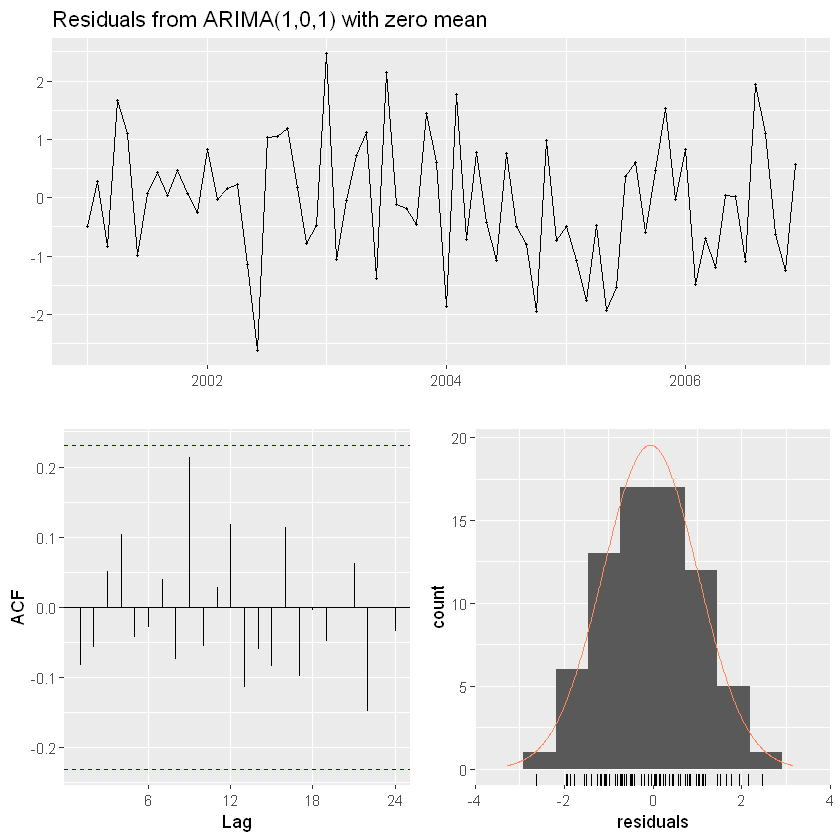

In [24]:
# diagnostic checking
# 적합성 진단 way1
checkresiduals(arima_3_101)

# 적합성 진단 way2
Box.test(arima_3_101$residuals, lag=10, type="Ljung-Box")

## 적합성 진단
p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 완벽한 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태이므로 arima_3_101모형은 적합이 아주 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with zero mean
Q* = 16.642, df = 11, p-value = 0.1189

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_3_300$residuals
X-squared = 13.465, df = 10, p-value = 0.1988


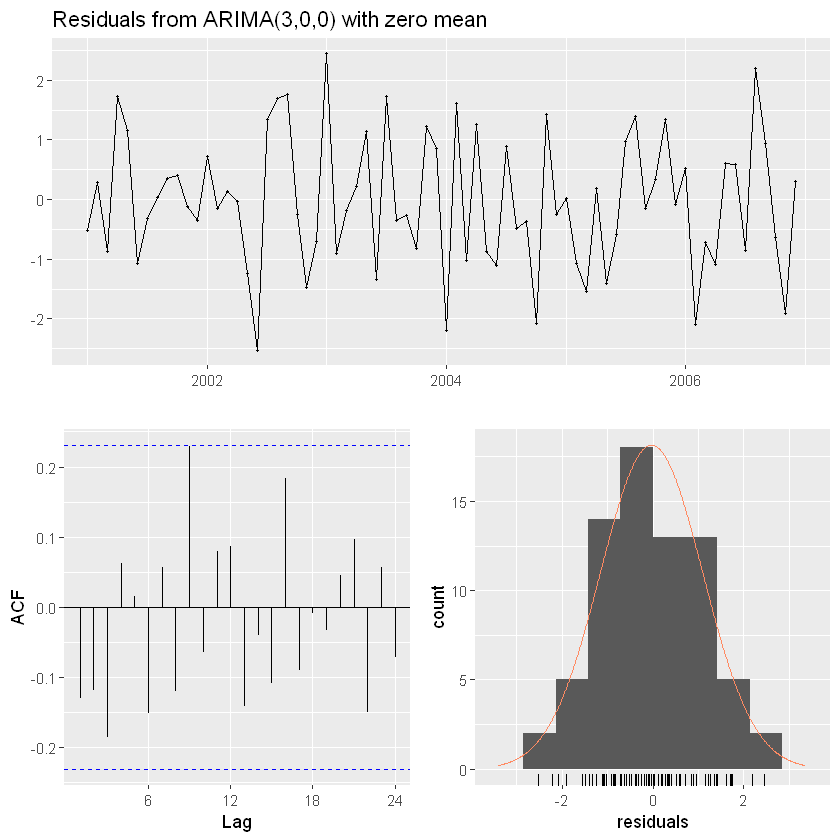

In [25]:
# 적합성 진단 way1
checkresiduals(arima_3_300)

# 적합성 진단 way2
Box.test(arima_3_300$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태이므로 arima_3_300모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(4,0,0) with zero mean
Q* = 10.652, df = 10, p-value = 0.3852

Model df: 4.   Total lags used: 14




	Box-Ljung test

data:  arima_3_400$residuals
X-squared = 6.8333, df = 10, p-value = 0.7411


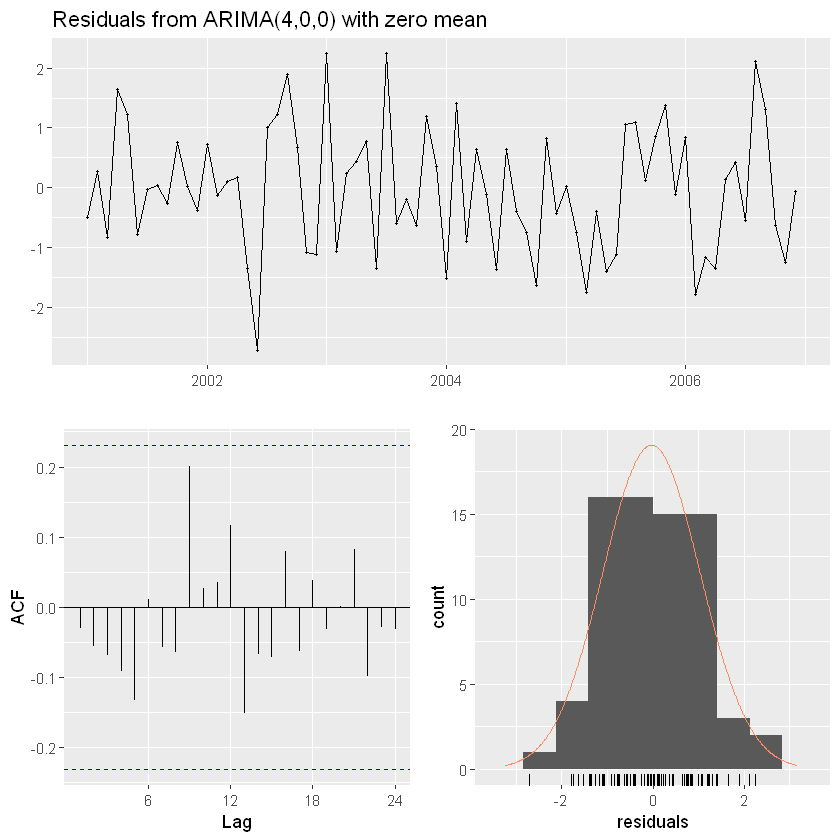

In [26]:
# 적합성 진단 way1
checkresiduals(arima_3_400)

# 적합성 진단 way2
Box.test(arima_3_400$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태이므로 arima_3_400모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with zero mean
Q* = 7.9281, df = 11, p-value = 0.7197

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_3_201$residuals
X-squared = 5.0444, df = 10, p-value = 0.8882


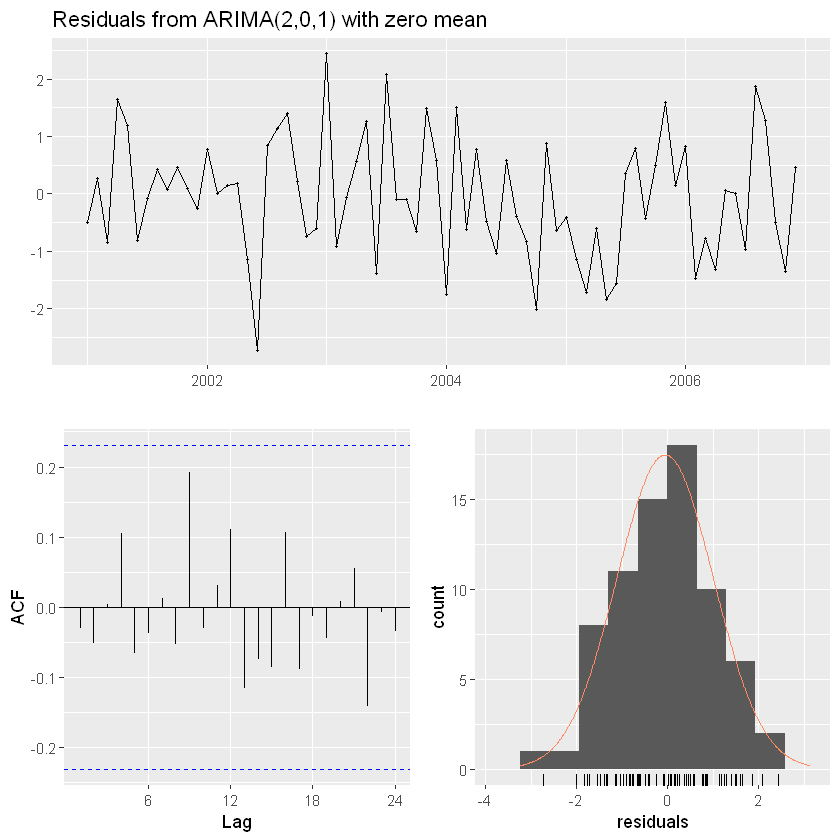

In [27]:
# 적합성 진단 way1
checkresiduals(arima_3_201)

# 적합성 진단 way2
Box.test(arima_3_201$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태이므로 arima_3_201모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with zero mean
Q* = 7.625, df = 11, p-value = 0.7464

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_3_102$residuals
X-squared = 4.7433, df = 10, p-value = 0.9077


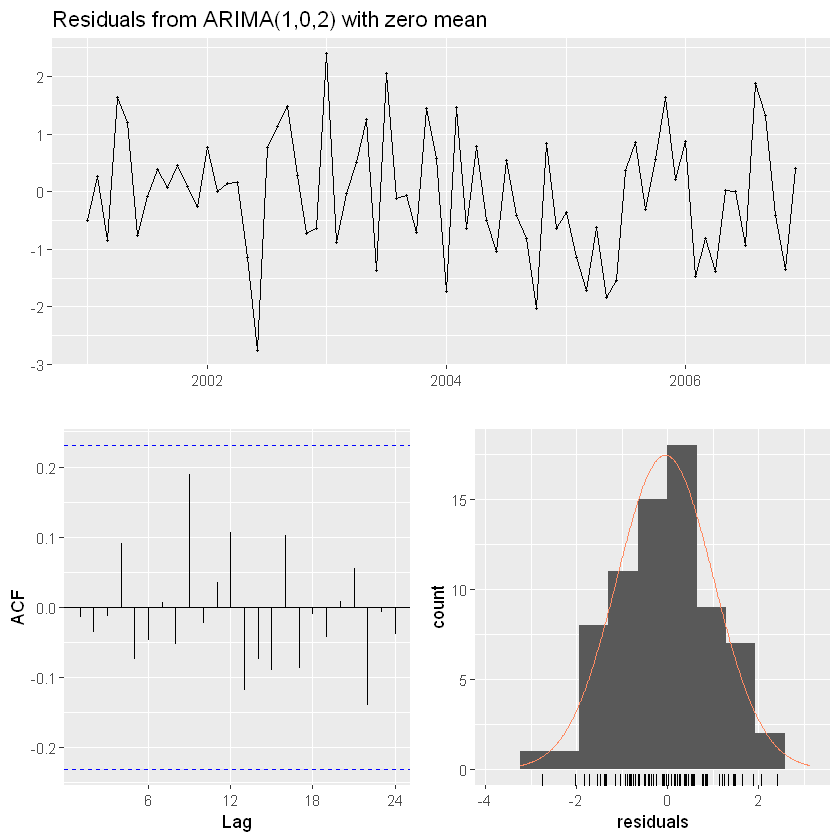

In [28]:
# 적합성 진단 way1
checkresiduals(arima_3_102)

# 적합성 진단 way2
Box.test(arima_3_102$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램도 정규분포 모양을 보이고 있습니다.<br/>
ACF도 백색잡음 형태이므로 arima_3_102모형은 적합이 잘 되었다고 말할 수 있습니다.<br/>


Forecast method: ARIMA(1,0,1) with zero mean

Model Information:
Series: data3 
ARIMA(1,0,1) with zero mean 

Coefficients:
          ar1      ma1
      -0.7646  -0.8073
s.e.   0.0750   0.0657

sigma^2 estimated as 1.163:  log likelihood=-108.04
AIC=222.07   AICc=222.43   BIC=228.9

Error measures:
                      ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.05742911 1.063392 0.8644376 -29.61912 112.0805 0.2634276
                    ACF1
Training set -0.08310596

Forecasts:
         Point Forecast      Lo 80      Hi 80     Lo 95       Hi 95
Jan 2007     -2.1302283 -3.5123514 -0.7481052 -4.244003 -0.01645344
Feb 2007      1.6287012 -0.9461374  4.2035397 -2.309175  5.56657690
Mar 2007     -1.2452503 -4.3093408  1.8188402 -5.931372  3.44087167
Apr 2007      0.9520767 -2.3647551  4.2689085 -4.120580  6.02473314
May 2007     -0.7279259 -4.1839510  2.7280992 -6.013460  4.55760835


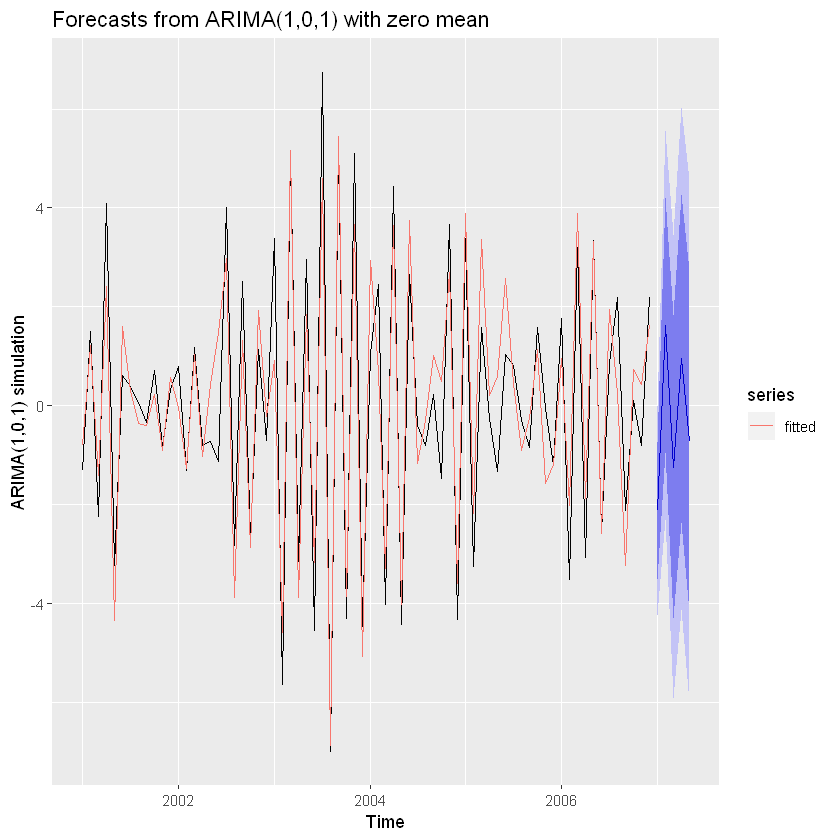

In [29]:
# forecasting
# 테스트
arima_3_101_F <- forecast(arima_3_101, h=5)
summary(arima_3_101_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_3_101_F) + autolayer(fitted(arima_3_101_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,0,1) simulation")


Forecast method: ARIMA(3,0,0) with zero mean

Model Information:
Series: data3 
ARIMA(3,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3
      -1.4713  -0.9593  -0.3684
s.e.   0.1088   0.1700   0.1079

sigma^2 estimated as 1.308:  log likelihood=-111.48
AIC=230.97   AICc=231.57   BIC=240.08

Error measures:
                     ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.0306534 1.119401 0.9143861 -37.73847 104.3176 0.2786488
                  ACF1
Training set -0.129659

Forecasts:
         Point Forecast      Lo 80     Hi 80     Lo 95      Hi 95
Jan 2007     -2.4820276 -3.9474518 -1.016603 -4.723200 -0.2408548
Feb 2007      1.8494674 -0.7574946  4.456429 -2.137537  5.8364717
Mar 2007     -1.1469910 -4.2961390  2.002157 -5.963197  3.6692152
Apr 2007      0.8277835 -2.4984381  4.154005 -4.259233  5.9148003
May 2007     -0.7989643 -4.1930074  2.595079 -5.989705  4.3917767


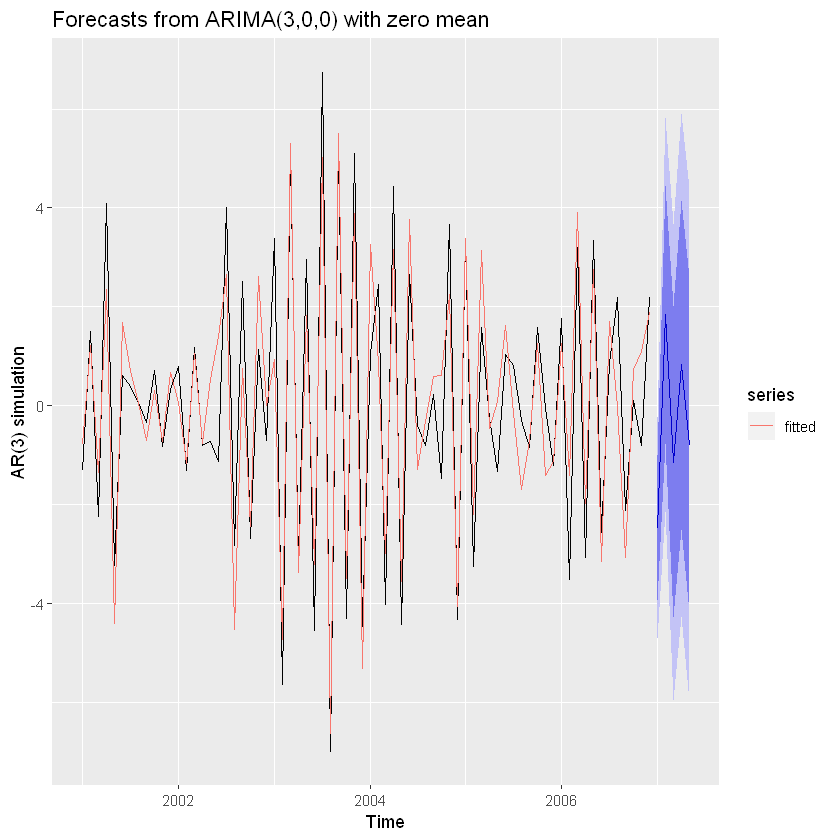

In [30]:
# 테스트
arima_3_300_F <- forecast(arima_3_300, h=5)
summary(arima_3_300_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_3_300_F) + autolayer(fitted(arima_3_300_F),series="fitted") + xlab("Time") + ylab("AR(3) simulation")


Forecast method: ARIMA(4,0,0) with zero mean

Model Information:
Series: data3 
ARIMA(4,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4
      -1.5843  -1.2618  -0.8343  -0.3152
s.e.   0.1110   0.1952   0.1969   0.1141

sigma^2 estimated as 1.195:  log likelihood=-107.91
AIC=225.82   AICc=226.72   BIC=237.2

Error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.03193296 1.062143 0.868084 -32.60516 103.4161 0.2645388
                    ACF1
Training set -0.03081682

Forecasts:
         Point Forecast     Lo 80      Hi 80     Lo 95    Hi 95
Jan 2007     -1.8597047 -3.260358 -0.4590511 -4.001819 0.282410
Feb 2007      0.8272435 -1.796886  3.4513726 -3.186016 4.840503
Mar 2007     -0.5357900 -3.688995  2.6174150 -5.358201 4.286621
Apr 2007      0.6663176 -2.686091  4.0187266 -4.460749 5.793385
May 2007     -0.4836227 -3.984116  3.0168706 -5.837165 4.869920


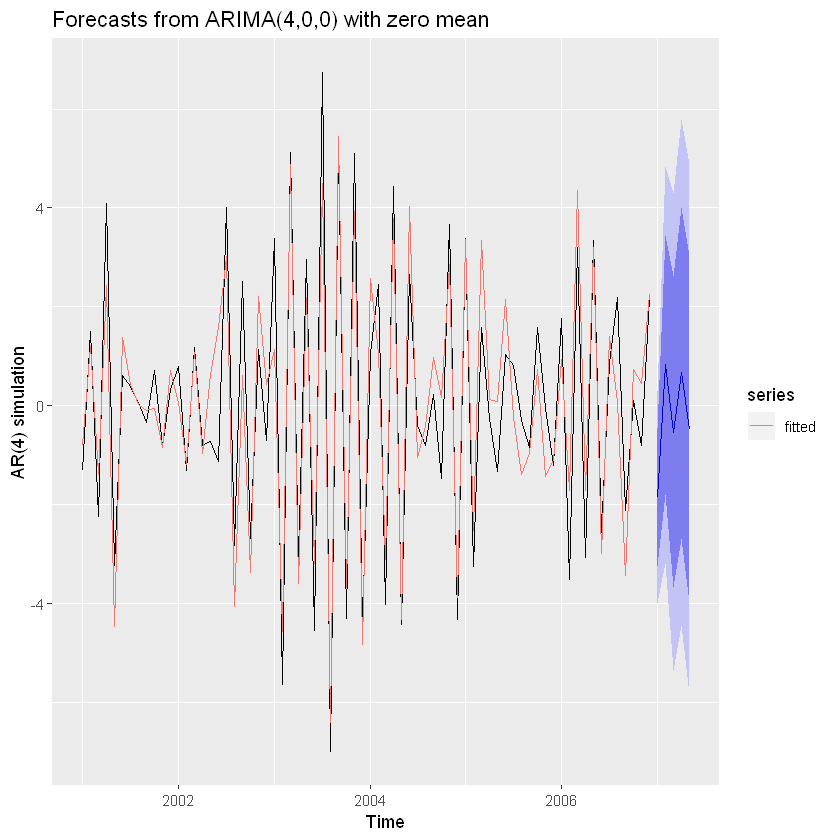

In [31]:
# 테스트
arima_3_400_F <- forecast(arima_3_400, h=5)
summary(arima_3_400_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_3_400_F) + autolayer(fitted(arima_3_400_F),series="fitted") + xlab("Time") + ylab("AR(4) simulation")


Forecast method: ARIMA(2,0,1) with zero mean

Model Information:
Series: data3 
ARIMA(2,0,1) with zero mean 

Coefficients:
          ar1      ar2      ma1
      -0.8636  -0.1153  -0.7694
s.e.   0.1398   0.1380   0.0881

sigma^2 estimated as 1.168:  log likelihood=-107.7
AIC=223.39   AICc=223.99   BIC=232.5

Error measures:
                      ME    RMSE       MAE       MPE     MAPE      MASE
Training set -0.05365799 1.05807 0.8570584 -29.66326 111.9154 0.2611789
                    ACF1
Training set -0.03004117

Forecasts:
         Point Forecast     Lo 80      Hi 80     Lo 95     Hi 95
Jan 2007     -2.1532010 -3.538336 -0.7680661 -4.271582 -0.034820
Feb 2007      1.6070299 -1.045262  4.2593215 -2.449300  5.663360
Mar 2007     -1.1395991 -4.341455  2.0622571 -6.036415  3.757217
Apr 2007      0.7988912 -2.652408  4.2501906 -4.479416  6.077198
May 2007     -0.5585437 -4.126715  3.0096279 -6.015591  4.898504


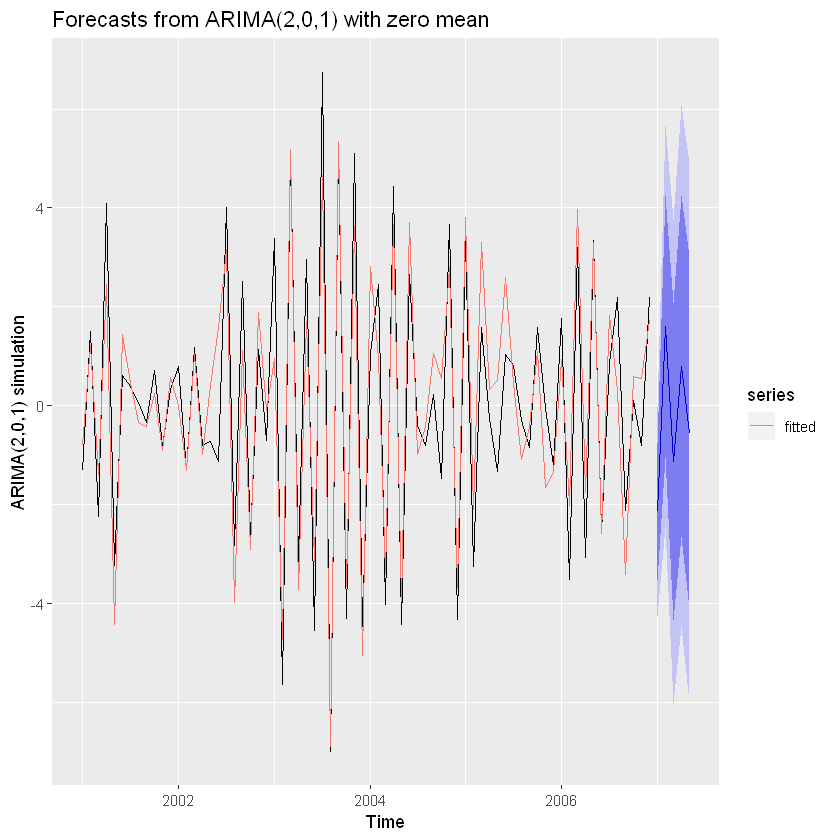

In [32]:
# 테스트
arima_3_201_F <- forecast(arima_3_201, h=5)
summary(arima_3_201_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_3_201_F) + autolayer(fitted(arima_3_201_F),series="fitted") + xlab("Time") + ylab("ARIMA(2,0,1) simulation")


Forecast method: ARIMA(1,0,2) with zero mean

Model Information:
Series: data3 
ARIMA(1,0,2) with zero mean 

Coefficients:
          ar1      ma1     ma2
      -0.6970  -0.9536  0.1598
s.e.   0.1137   0.1642  0.1612

sigma^2 estimated as 1.164:  log likelihood=-107.58
AIC=223.17   AICc=223.76   BIC=232.27

Error measures:
                     ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.0508184 1.056285 0.8532979 -29.85785 110.7585 0.2600329
                    ACF1
Training set -0.01399622

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95       Hi 95
Jan 2007     -2.1279028 -3.510702 -0.745104 -4.242711 -0.01309453
Feb 2007      1.5478405 -1.120862  4.216543 -2.533587  5.62926818
Mar 2007     -1.0788960 -4.304604  2.146812 -6.012190  3.85439806
Apr 2007      0.7520262 -2.712127  4.216179 -4.545939  6.04999134
May 2007     -0.5241871 -4.098453  3.050079 -5.990555  4.94218122


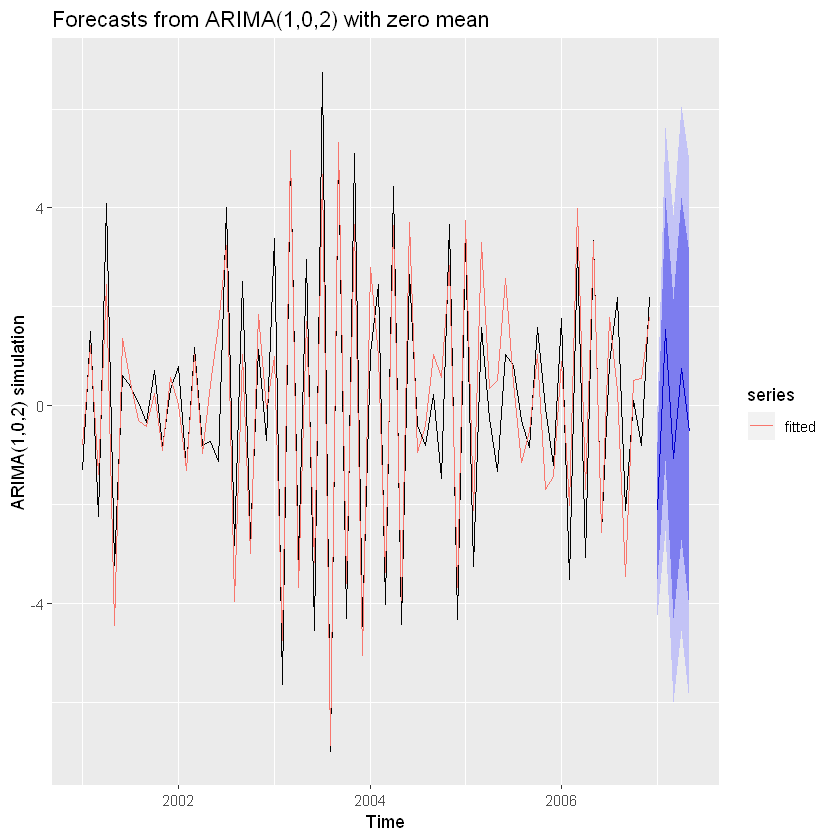

In [33]:
# 테스트
arima_3_102_F <- forecast(arima_3_102, h=5)
summary(arima_3_102_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_3_102_F) + autolayer(fitted(arima_3_102_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,0,2) simulation")

In [34]:
library(data.table)
# 예측값들 표로 정리해서 보여주기
table <- data.table(arima_3_101_F$mean,arima_3_300_F$mean,arima_3_400_F$mean,arima_3_201_F$mean,arima_3_102_F$mean)
colnames(table)<- c("ARIMA(1,0,1)","ARIMA(3,0,0)","ARIMA(4,0,0)","ARIMA(2,0,1)","ARIMA(1,0,2)")
rownames(table)<- c("h1","h2","h3","h4","h5")
table

,"ARIMA(1,0,1)","ARIMA(3,0,0)","ARIMA(4,0,0)","ARIMA(2,0,1)","ARIMA(1,0,2)"
,<ts>,<ts>,<ts>,<ts>,<ts>
h1,-2.1302283,-2.4820276,-1.8597047,-2.1532010,-2.1279028
h2,1.6287012,1.8494674,0.8272435,1.6070299,1.5478405
h3,-1.2452503,-1.1469910,-0.5357900,-1.1395991,-1.0788960
h4,0.9520767,0.8277835,0.6663176,0.7988912,0.7520262
h5,-0.7279259,-0.7989643,-0.4836227,-0.5585437,-0.5241871


## 예측
**RMSE 비교**<br/>
arima_3_101의 RMSE = 1.063392<br/>
arima_3_300의 RMSE = 1.119401<br/>
arima_3_400의 RMSE = 1.062143<br/>
arima_3_201의 RMSE = 1.05807<br/>
arima_3_102의 RMSE = 1.056285<br/>

**AICc 비교**<br/>
arima_3_101의 AICc = 222.43<br/>
arima_3_300의 AICc = 231.57<br/>
arima_3_400의 AICc = 226.72<br/>
arima_3_201의 AICc = 223.99<br/>
arima_3_102의 AICc = 223.76<br/>

RMSE 값을 비교했을 때 가장 적은 모형은 ARIMA(1,0,2) 모형입니다.<br/>
하지만 AICc값을 비교해보면 파라메터 수가 가장 적어 정보손실량이 적은 ARIMA(1,0,1) 모형입니다.<br/>

test 데이터 없이 train 데이터에만 의존하는 상황이니 RMSE값이 큰 의미를 갖지 않을 것이며, 정보손실량은 약 1.3 정도 차이나지만 RMSE는 0.01정도 높은 것이니까 파라메터가 더 적은 ARIMA(1,0,1) 모형을 가장 좋은 모형이라고 평가하겠습니다.<br/>

여기까지가 세 번째 실습입니다.
***

## LAB4
네 번째 실습내용입니다.<br/>


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.1378 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


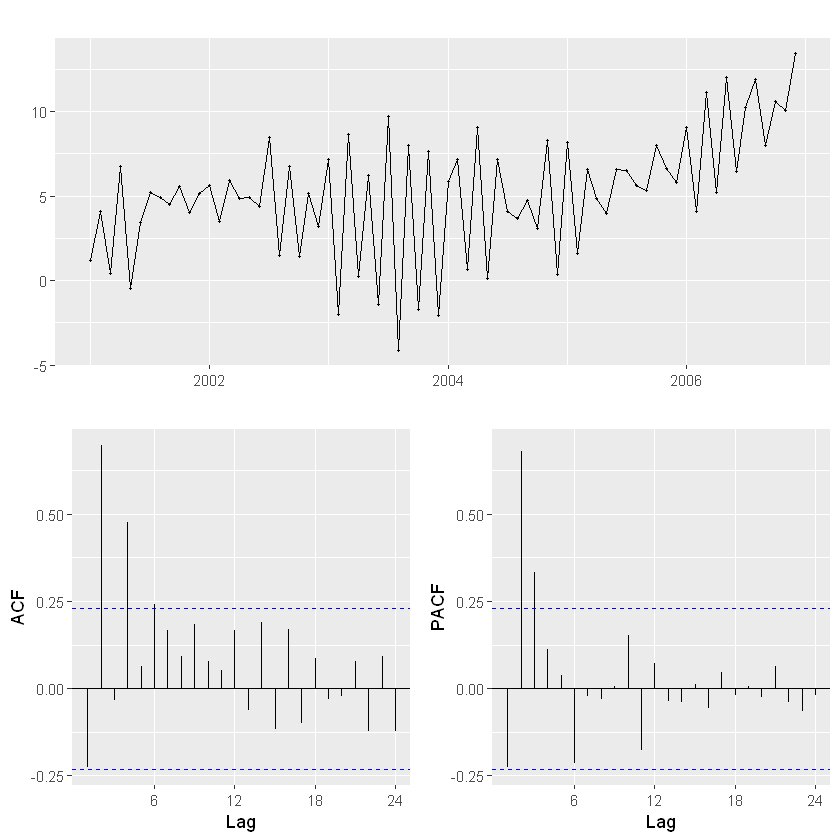

In [35]:
# convert rawdata to time series object_monthly data
data4 <- ts(rawdata$data_4, start=c(2001,1), frequency=12)

#identification
ggtsdisplay(data4)

summary(ur.kpss(data4))

## 예비 분석
원계열을 그려보았을 때 평균이 일정하지 않고 추세를 갖는 것을 알 수 있습니다.<br/>
kpss 검정통계량을 활용하여 정말 정상성을 만족하는 지 확인해보았을 때도 유의수준 1%의 임계값보다 kpss 검정통계량이 더 크므로 귀무가설 기각, 대립가설을 채택하게되며 정상시계열이 아닙니다.<br/>

이런 경우 차분이 필요합니다.<br/>

## 모형식별
ACF와 PACF 패턴을 보면 correlgoram에서 ARIMA(0,2,0)으로 보여집니다.<br/>
ACF는 선형 감소하며 PACF는 두개가 튀어올라와 있는 형태로 보이기 때문입니다.<br/>

하지만 육안으로 판별하는 것이 항상 일치하지는 않을 수 있으므로 1차 차분을 하고나서 다시 ACF와 PACF를 확인해보겠습니다.<br/>


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0874 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


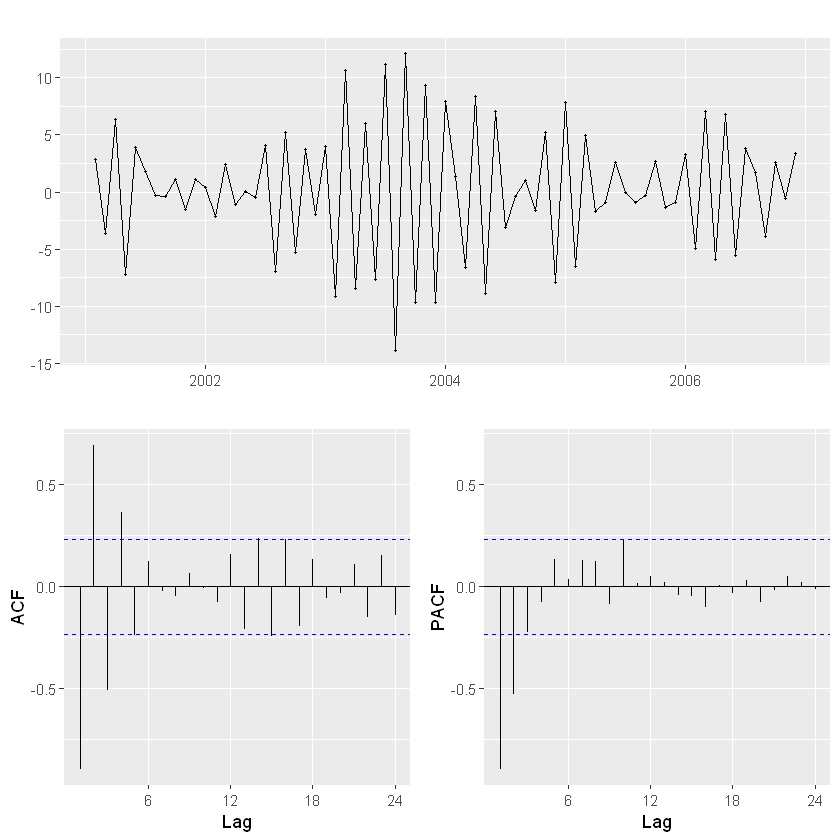

In [36]:
# 차분
data4_d <- diff(data4)

ggtsdisplay(data4_d)
summary(ur.kpss(data4_d))

## 예비 분석
1차 차분 계열을 그려보았을 때 평균과 분산이 안정화되었니다.<br/>
kpss 검정통계량을 활용하여 정말 정상성을 만족하는 지 확인해보았을 때도 유의수준 1%의 임계값보다 kpss 검정통계량이 더 작으므로 귀무가설 채택, 정상시계열입니다.<br/>
2차 차분까지 하지 않아도 되고 이제 ARIMA(p,1,q)로 p와 q만 추정하면 됩니다.<br/>

## 모형식별
ACF와 PACF 패턴을 보면 correlgoram에서 ARIMA(2,1,0)으로 보여집니다.<br/>
ACF는 양측에서 지수적으로 감소하며 PACF는 두개가 튄 형태로 보이기 때문입니다.<br/>

ARIMA(1,1,1)과 ARIMA(2,1,1)까지 함께 확인해보겠습니다.<br/>

In [37]:
# estimation
arima_4_210 <- Arima(data4, order=c(2,1,0), include.mean=FALSE)
arima_4_210

arima_4_111 <- Arima(data4, order=c(1,1,1), include.mean=FALSE)
arima_4_111

arima_4_211 <- Arima(data4, order=c(2,1,1), include.mean=FALSE)
arima_4_211

Series: data4 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -1.3760  -0.5379
s.e.   0.0985   0.0983

sigma^2 estimated as 4.424:  log likelihood=-153.67
AIC=313.34   AICc=313.7   BIC=320.13

Series: data4 
ARIMA(1,1,1) 

Coefficients:
          ar1      ma1
      -0.8272  -0.5649
s.e.   0.0657   0.0778

sigma^2 estimated as 4.363:  log likelihood=-153.18
AIC=312.36   AICc=312.71   BIC=319.14

Series: data4 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -1.1526  -0.3424  -0.3812
s.e.   0.1489   0.1441   0.1284

sigma^2 estimated as 4.136:  log likelihood=-150.88
AIC=309.76   AICc=310.36   BIC=318.81

## 모수 추정

차분하게 되면 데이터 평균이 0 주위를 왔다갔다하게 되곤합니다. 상수항 즉 mean 값은 크게 필요하지 않아 미포함하였습니다.<br/>


*arima_4_210의 모형식*<br/>
(1+1.3760×𝑌_(𝑡-1)+0.5379×𝑌_(𝑡-2))×(1-𝑌_(𝑡-1))×𝑌_𝑡=𝜀_𝑡<br/>
또는 (1+1.3760×B+0.5379×B^2)×(1-B)×𝑌_𝑡=𝜀_𝑡<br/>

*arima_4_111의 모형식*<br/>
(1+0.8272×𝑌_(𝑡-1))×(1-𝑌_(𝑡-1))×𝑌_𝑡=(1-0.5649×𝜀_(𝑡-1))𝜀_𝑡<br/>
또는 (1+0.8272×B)×(1-B)×𝑌_𝑡=(1+0.5649×B)𝜀_𝑡<br/>

*arima_4_211의 모형식*<br/>
(1+1.1.1526×𝑌_(𝑡-1)+0.3424×𝑌_(𝑡-2))×(1-𝑌_(𝑡-1))×𝑌_𝑡=(1-0.3812×𝜀_(𝑡-1))𝜀_𝑡<br/>
(1+1.1.1526×B+0.3424×B^2)×(1-B)×𝑌_𝑡=(1-0.3812×B)𝜀_𝑡<br/>


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 19.654, df = 12, p-value = 0.07392

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_4_210$residuals
X-squared = 17.34, df = 10, p-value = 0.06716


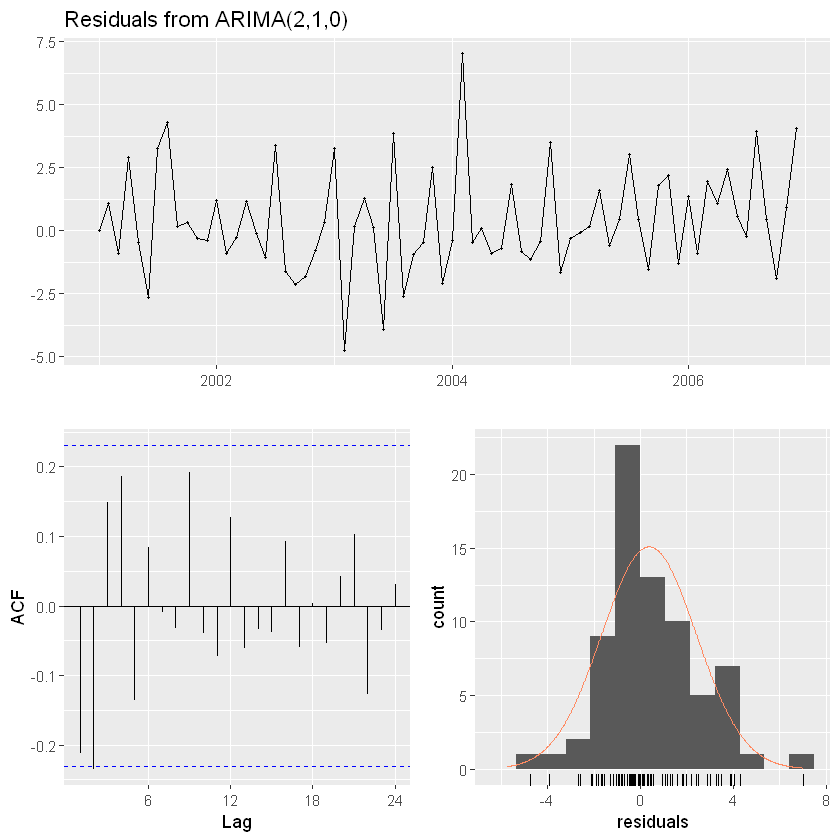

In [38]:
# diagnostic checking
# 적합성 진단 way1
checkresiduals(arima_4_210)

# 적합성 진단 way2
Box.test(arima_4_210$residuals, lag=10, type="Ljung-Box")

## 적합성 진단
p\-value가 유의수준 0.05보다 아주 조금 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 정규분포 모양이라기에 거리가 있어보입니다.<br/>
ACF는 백색잡음 형태이므로 arima_4_210모형은 잔차 평가 보통 수준이라고 하겠습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 18.412, df = 12, p-value = 0.1038

Model df: 2.   Total lags used: 14




	Box-Ljung test

data:  arima_4_111$residuals
X-squared = 16.506, df = 10, p-value = 0.08604


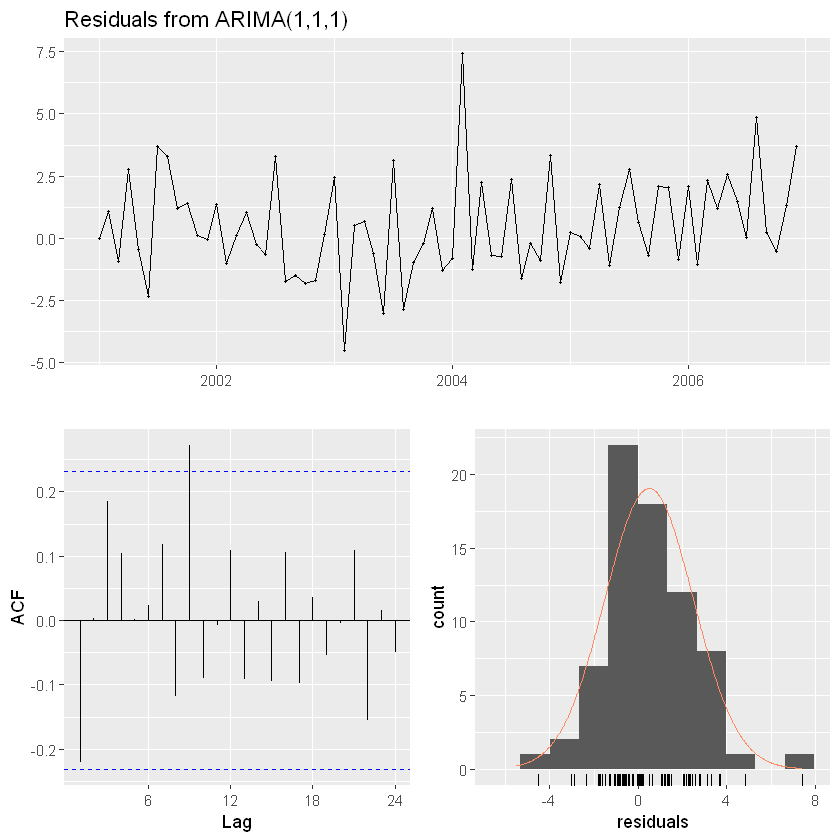

In [39]:
# 적합성 진단 way1
checkresiduals(arima_4_111)

# 적합성 진단 way2
Box.test(arima_4_111$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 아주 조금 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 정규분포 모양으로 보입니다.<br/>
ACF는 미세하지만 한 값이 튄 것으로 확인됩니다. arima_4_111모형은 잔차 평가 보통 수준이라고 하겠습니다.<br/>


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 11.298, df = 11, p-value = 0.4186

Model df: 3.   Total lags used: 14




	Box-Ljung test

data:  arima_4_211$residuals
X-squared = 9.8713, df = 10, p-value = 0.4519


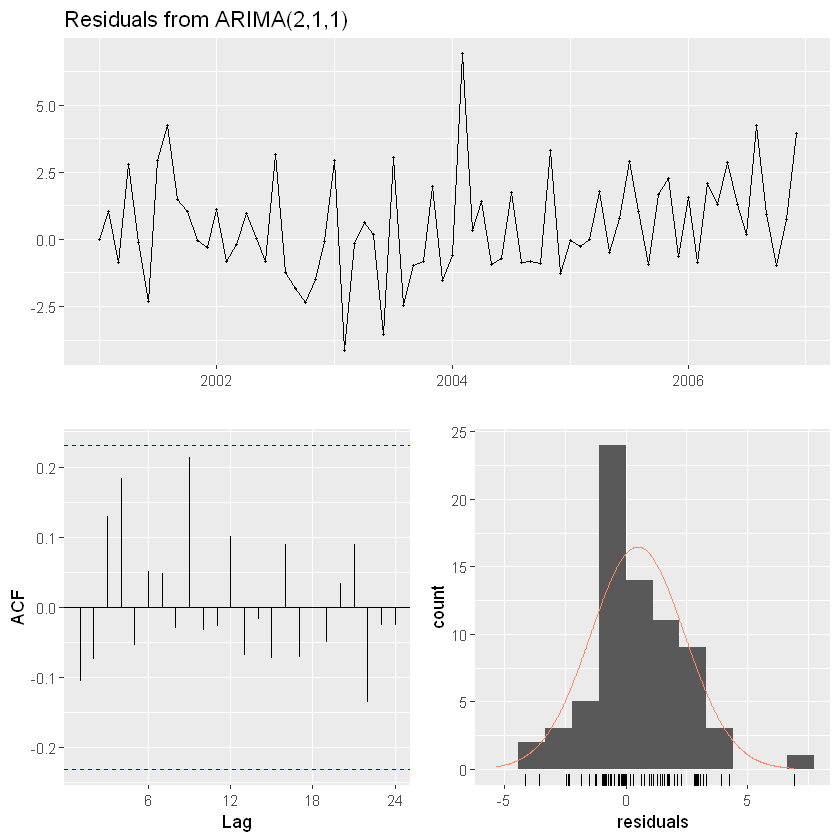

In [40]:
# 적합성 진단 way1
checkresiduals(arima_4_211)

# 적합성 진단 way2
Box.test(arima_4_211$residuals, lag=10, type="Ljung-Box")

p\-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 있는 충분한 통계적 증거가 없는 상황이므로 귀무가설을 채택, 잔차 간 자기상관성이 없습니다.<br/>

잔차 히스토그램은 정규분포 모양으로 보입니다.<br/>
ACF는 백색잡음 형태로 확인됩니다. arima_4_211모형은 잔차 평가 결과가 우수하다고 하겠습니다.<br/>


Forecast method: ARIMA(2,1,0)

Model Information:
Series: data4 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -1.3760  -0.5379
s.e.   0.0985   0.0983

sigma^2 estimated as 4.424:  log likelihood=-153.67
AIC=313.34   AICc=313.7   BIC=320.13

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 0.3687738 2.059094 1.523589 1.353815 63.18588 0.4078128 -0.2115333

Forecasts:
         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       9.079583  6.383993 11.77517 4.957033 13.20213
Feb 2007      13.261502 10.381667 16.14134 8.857174 17.66583
Mar 2007       9.852531  5.945512 13.75955 3.877261 15.82780
Apr 2007      12.293937  8.367268 16.22061 6.288614 18.29926
May 2007      10.768152  6.442175 15.09413 4.152141 17.38416


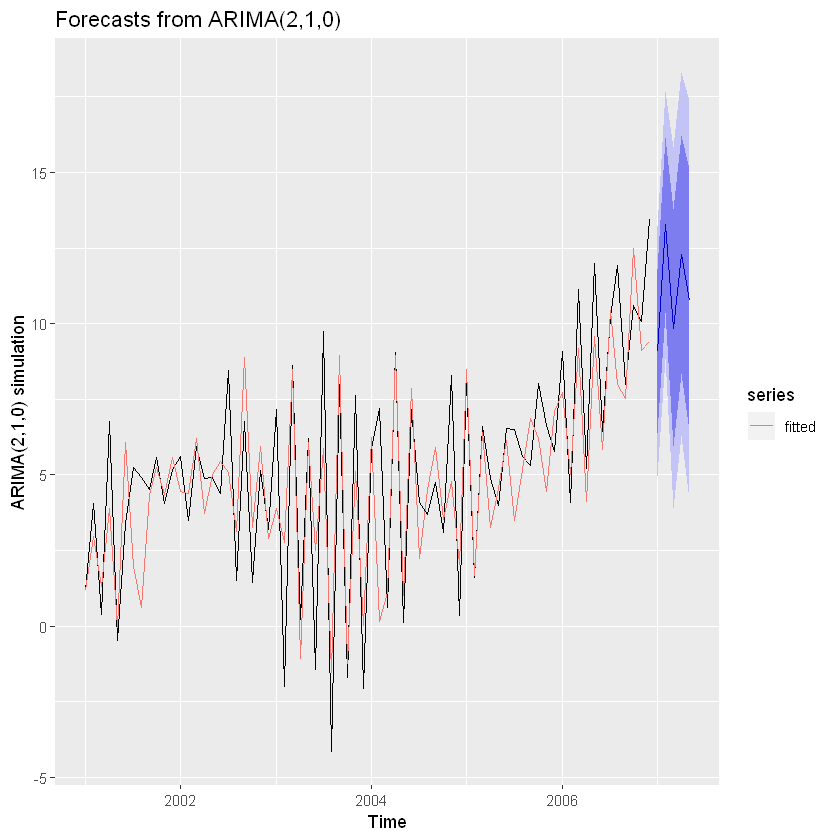

In [41]:
# forecasting
# 테스트
arima_4_210_F <- forecast(arima_4_210, h=5)
summary(arima_4_210_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_4_210_F) + autolayer(fitted(arima_4_210_F),series="fitted") + xlab("Time") + ylab("ARIMA(2,1,0) simulation")


Forecast method: ARIMA(1,1,1)

Model Information:
Series: data4 
ARIMA(1,1,1) 

Coefficients:
          ar1      ma1
      -0.8272  -0.5649
s.e.   0.0657   0.0778

sigma^2 estimated as 4.363:  log likelihood=-153.18
AIC=312.36   AICc=312.71   BIC=319.14

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.4915208 2.044764 1.559208 -2.501261 58.52325 0.4173468 -0.220858

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       8.563689 5.886858 11.24052 4.469829 12.65755
Feb 2007      12.597208 9.721959 15.47246 8.199895 16.99452
Mar 2007       9.260818 5.739561 12.78207 3.875520 14.64612
Apr 2007      12.020567 8.461581 15.57955 6.577567 17.46357
May 2007       9.737796 5.838922 13.63667 3.774983 15.70061


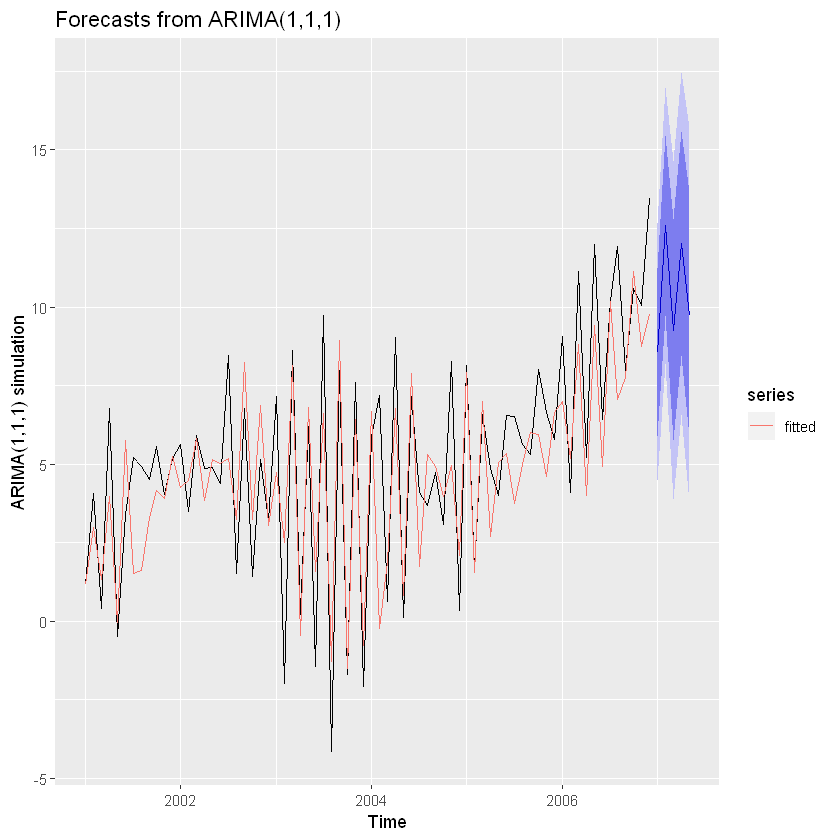

In [42]:
# 테스트
arima_4_111_F <- forecast(arima_4_111, h=5)
summary(arima_4_111_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_4_111_F) + autolayer(fitted(arima_4_111_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,1,1) simulation")


Forecast method: ARIMA(2,1,1)

Model Information:
Series: data4 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -1.1526  -0.3424  -0.3812
s.e.   0.1489   0.1441   0.1284

sigma^2 estimated as 4.136:  log likelihood=-150.88
AIC=309.76   AICc=310.36   BIC=318.81

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.4810276 1.976322 1.491849 -0.7433238 56.16279 0.3993171
                   ACF1
Training set -0.1064766

Forecasts:
         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       8.228179  5.621992 10.83437 4.242360 12.21400
Feb 2007      13.078086 10.123799 16.03237 8.559894 17.59628
Mar 2007       9.272566  5.513803 13.03133 3.524034 15.02110
Apr 2007      11.998226  8.193517 15.80294 6.179426 17.81703
May 2007      10.159626  6.071214 14.24804 3.906939 16.41231


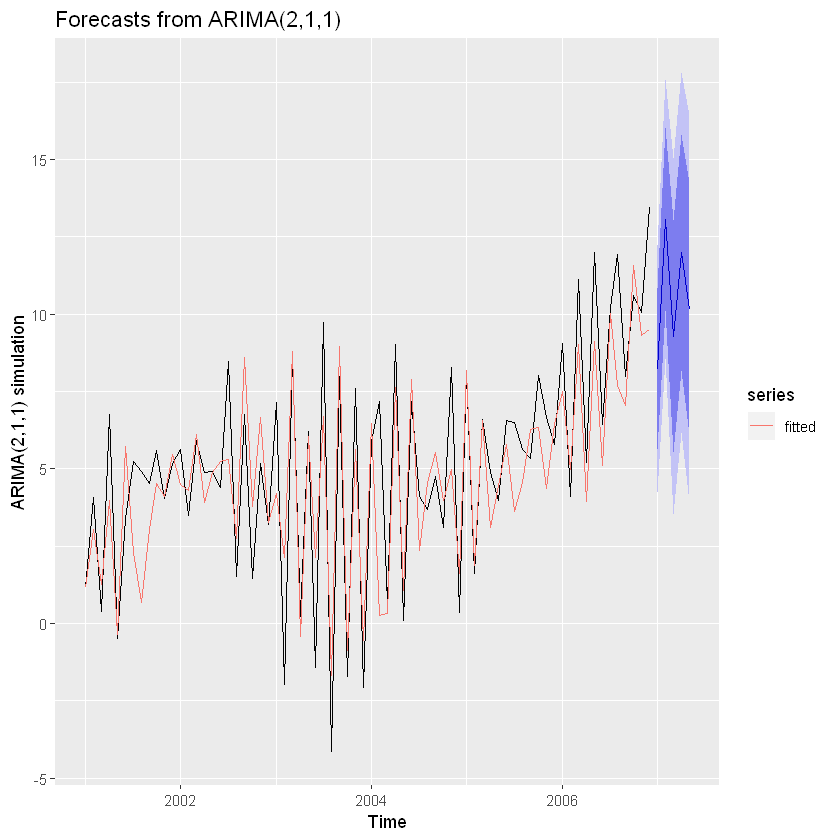

In [43]:
# 테스트
arima_4_211_F <- forecast(arima_4_211, h=5)
summary(arima_4_211_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_4_211_F) + autolayer(fitted(arima_4_211_F),series="fitted") + xlab("Time") + ylab("ARIMA(2,1,1) simulation")

In [44]:
library(data.table)
# 예측값들 표로 정리해서 보여주기
table <- data.table(arima_4_210_F$mean,arima_4_111_F$mean,arima_4_211_F$mean)
colnames(table)<- c("ARIMA(2,1,0)","ARIMA(1,1,1)","ARIMA(2,1,1)")
rownames(table)<- c("h1","h2","h3","h4","h5")
table

,"ARIMA(2,1,0)","ARIMA(1,1,1)","ARIMA(2,1,1)"
,<ts>,<ts>,<ts>
h1,9.079583,8.563689,8.228179
h2,13.261502,12.597208,13.078086
h3,9.852531,9.260818,9.272566
h4,12.293937,12.020567,11.998226
h5,10.768152,9.737796,10.159626


## 예측
**RMSE 비교**<br/>
arima_4_210의 RMSE = 2.059094
arima_4_111의 RMSE = 2.044764
arima_4_211의 RMSE = 1.976322

**AICc 비교**<br/>
arima_4_210의 AICc = 313.7
arima_4_111의 AICc = 312.71
arima_4_211의 AICc = 310.36
<br/>

RMSE 값을 비교했을 때 가장 적은 모형은 ARIMA(2,1,1) 모형입니다.<br/>
AICc 값을 비교해보았을 때에도 ARIMA(1,0,1) 모형이 가장 정보손실량이 적다고 나왔습니다.<br/>

파라메터가 가장 많은데도 불구하고 정보손실량이 다른 모형과 비교했을 때 약 2.4~3.4 정도 차이나며 RMSE도 0.1정도 낮으니까 ARIMA(2,1,1) 모형을 가장 좋은 모형이라고 평가하겠습니다.<br/>